# Ensembles: Random Forest, Bagging, Blending

**Исполнители (ФИО):** Your answer here

---

Здравствуйте! На прошедших семинарах мы разобрали все популярные идеи отдельных методов классического машинного обучение, однако, помимо этого есть ещё два подхода работы с этимим моделями, которые позволяют улучшить результаты в решении задач классификации и регрессии. На этом семинаре вы познакомитесь с первым из них - построение ансамблей

In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=ConvergenceWarning)

Идея ансамблевого алгоритма заключается в использовании отдельных моделей для построения новой объединённой модели, основной принцип тут: Много разных моделей лучше одной. При таком подходе модели, входящие в ансамбль, начинают специализироваться на отдельных частях данных, что позволяет объединённой модели «запоминать» больше особенностей 

Есть два подхода построения ансамблей: 
1) Бэггинг -  объединение большого количества одинаковых моделей, каждая из которых обучается на случайной подвыборке из фичей и данных. Например, на данном принципе основан Случайный Лес (*Random Forest*), который по сути является объединением деревьев
2) Блендинг - объединение разных моделей, каждая из которых обучается на всей тренировочной выборке

## Задача 1

Загрузите датасет *MiceProtein.csv*, в качестве таргета используйте колонку *class*

In [ ]:
#Your code here

Используйте [Дерево решений](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) для классификации, осуществите подбор гиперпараметров с помощью [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html). Постройте полученное дерево, оцените качество классификации 

In [ ]:
#Your code here

Постройте [Случайный лес](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html), используйте полученные параметры оптимального дерева. Оцените качество классификации

In [ ]:
#Your code here

Помимо всех уже известных вам параметров Дерева решений, Случайный лес имеет параметр *n_estimators* - количество деревьев в лесе. Он также определяет склонность леса к переобучению

Используйте [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html), чтобы подобрать оптимальное количество деревьев в построенном вами ранее лесе. Постройте зависимость метрики качества от параметра на тренировочной и валидационной выборках с помощью атрибутов класса GridSearchCV

In [ ]:
#Your code here

**Вопрос:** Как меняется качество классификации от количества деревьев на тренировочной и валидационной выборках? Какое оптимальное значение количества деревьев вы выбрали? Почему?

*Your answer here*

Лес, как и дерево, считает важность фичей. Выведите график важности фичей у вашего леса и постройте модель на основе важных фичей  

In [ ]:
#Your code here

Сравните все три модели: Дерево, Лес и Лес на важных фичах

In [ ]:
#Your code here

**Вопрос:** Какая модель оказалась лучшей? Почему?

*Your answer here*

## Задача 2

Перебор гиперпараметров по сетке хотя и является хорошим, но не оптимальным методом подбора наилучших параметров. Поиск по сетке можно улучшить с помощью [Байесовской оптимизации](https://ru.wikipedia.org/wiki/%D0%9E%D0%BF%D1%82%D0%B8%D0%BC%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F_%D0%B3%D0%B8%D0%BF%D0%B5%D1%80%D0%BF%D0%B0%D1%80%D0%B0%D0%BC%D0%B5%D1%82%D1%80%D0%BE%D0%B2), которая позволяет проходить не по всей сетке, а на некотором оптимальном подможестве

Этот подход реализован в библиотеке [optuna](https://optuna.org/), ниже приведет код использования для упрощения работы с данной либой

In [ ]:
# !pip install optuna
!ping -c 3 pypi.org

In [62]:

from sklearn.ensemble import RandomForestClassifier
from optuna import create_study
from optuna.pruners import HyperbandPruner
from optuna.visualization import plot_optimization_history
from optuna.storages import RDBStorage
from optuna.trial import TrialState

In [ ]:

def random_forest_opt(trial):
    # выберите диапозон рассматриваемых параметров
    params = {
        "criterion": trial.suggest_categorical("criterion", ['gini', 'entropy']),
        "max_depth": trial.suggest_int("max_depth", 2, 20, step=1),
        "random_state": 42,
    }

    clf = RandomForestClassifier(**params)
    clf.fit(X, y)

    return clf.score(X, y)

user_name = "postgres"
user_password = "postgres"
host = "127.0.0.1"
port = "5432"
database = "gyrostab_optuna" 
iterations = 1000 # выберите количество итераций алгоритма
hw_iter = 0
study_name = f"hw_{hw_iter}" # необобходимо менять для разных прогонов optuna
hw_iter += 1

url_str = f"postgresql+psycopg2://{user_name}:{user_password}@{host}:{port}/{database}"
storage = "sqlite:///optuna.db"

study = create_study(
    load_if_exists=True,
    storage=storage,
    study_name=study_name,
    pruner=HyperbandPruner,
    direction="maximize", # В зависимости от вашей метрики, выберите направление работы алгоритма
)

study.optimize(random_forest_opt, n_trials=iterations)

Загрузите свой датасет из проекта

In [ ]:
#Your code here

Используйте Случайный лес для [классификации](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) и [регрессии](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) на ваших данных. Подберите гиперпараметры используя [оптуну](https://optuna.readthedocs.io/en/stable/). Изобразите кривую обучения с помощью библиотеки [plotly](https://habr.com/ru/articles/502958/), подсветите на ней точку с оптимальными гиперпараметрами

In [ ]:
#Your code here

## Задача 3

Когда у вас уже есть какая-то хорошая модель, Бэггинг - хороший способ попробовать повысить качество, построив ансамбль на её основе. Как вы поните, его можно делать на базе любой модели, лес лишь частный случай. Обычно в Бэггинг объединяют десятки/сотни моделей, тем самым повышая шанс покрыть всю специфику данных, однако тут тоже нужно следить за переобучением 

Загрузите датасет *richters_piece_1.csv*

In [63]:
df = pd.read_csv("richters_piece_1.csv")
print(f"Shape: {df.shape}")
print("Columns:", list(df.columns))

display(df.head())

print("\nDtypes:")
print(df.dtypes)

Shape: (10000, 41)
Columns: ['Unnamed: 0', 'building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id', 'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage', 'land_surface_condition', 'foundation_type', 'roof_type', 'ground_floor_type', 'other_floor_type', 'position', 'plan_configuration', 'has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag', 'has_superstructure_cement_mortar_stone', 'has_superstructure_mud_mortar_brick', 'has_superstructure_cement_mortar_brick', 'has_superstructure_timber', 'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered', 'has_superstructure_rc_engineered', 'has_superstructure_other', 'legal_ownership_status', 'count_families', 'has_secondary_use', 'has_secondary_use_agriculture', 'has_secondary_use_hotel', 'has_secondary_use_rental', 'has_secondary_use_institution', 'has_secondary_use_school', 'has_secondary_use_industry', 'has_secondary_use_health_post', 'has_secondary_use_

,Unnamed: 0,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,0,190791,26,39,11440,1,45,10,2,t,...,0,0,0,0,0,0,0,0,0,2
1,1,205275,27,181,1421,4,40,10,11,t,...,0,0,0,0,0,0,0,0,0,3
2,2,390536,6,453,6430,3,25,7,6,t,...,0,0,0,0,0,0,0,0,0,3
3,3,830902,26,897,3044,2,40,6,6,t,...,0,0,0,0,0,0,0,0,0,2
4,4,465883,10,310,1144,2,35,11,4,t,...,0,0,0,0,0,0,0,0,0,2



Dtypes:
Unnamed: 0                                 int64
building_id                                int64
geo_level_1_id                             int64
geo_level_2_id                             int64
geo_level_3_id                             int64
count_floors_pre_eq                        int64
age                                        int64
area_percentage                            int64
height_percentage                          int64
land_surface_condition                    object
foundation_type                           object
roof_type                                 object
ground_floor_type                         object
other_floor_type                          object
position                                  object
plan_configuration                        object
has_superstructure_adobe_mud               int64
has_superstructure_mud_mortar_stone        int64
has_superstructure_stone_flag              int64
has_superstructure_cement_mortar_stone     int64
has_superst

Используйте [Случайный лес](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) для классификации, подберите гиперпараметры, оцените качетсво

In [64]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer
import optuna

In [65]:
TARGET_COL = "damage_grade" 

y = df[TARGET_COL]
X = df.drop(columns=[TARGET_COL])
X_num = X.copy()
for c in X_num.select_dtypes(include=["object", "category"]).columns:
    X_num[c] = X_num[c].astype("category").cat.codes
    

imp = SimpleImputer(strategy="median")
X_imp = imp.fit_transform(X_num)

In [66]:

# Разделяем признаки и таргет 

X_train, X_test, y_train, y_test = train_test_split(
    X_imp, y, test_size=0.2, random_state=None, stratify=y
)

# Целевая функция для Optuna
def objective(trial):
    # Подбор гиперпараметров(малый, тк linspace ждать не хочется)
    n_estimators = trial.suggest_int("n_estimators", 100, 500)
    max_depth = trial.suggest_int("max_depth", 3, 30)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 20)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 10)
    max_features = trial.suggest_categorical("max_features", ["sqrt", "log2", None])
    bootstrap = trial.suggest_categorical("bootstrap", [True, False])

    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        bootstrap=bootstrap,
        n_jobs=-1,
        random_state=None,
    )

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=None)
    scores = cross_val_score(model, X_train, y_train, cv=cv, scoring="accuracy", n_jobs=-1)
    return scores.mean()

# Запуск байесовской оптимизации
study = create_study(direction="maximize", pruner=HyperbandPruner())
study.optimize(objective, n_trials=50, show_progress_bar=True)

print("Best value (CV accuracy):", study.best_value)
print("Best params:")
for k, v in study.best_params.items():
    print(f"  {k}: {v}")

[I 2025-11-15 12:21:13,162] A new study created in memory with name: no-name-772716e5-9c04-493c-ba04-8c0b618b76dd
Best trial: 0. Best value: 0.649375:   2%|▏         | 1/50 [00:04<03:19,  4.07s/it]

[I 2025-11-15 12:21:17,227] Trial 0 finished with value: 0.649375 and parameters: {'n_estimators': 443, 'max_depth': 16, 'min_samples_split': 2, 'min_samples_leaf': 8, 'max_features': 'sqrt', 'bootstrap': True}. Best is trial 0 with value: 0.649375.


Best trial: 1. Best value: 0.652375:   4%|▍         | 2/50 [00:06<02:28,  3.09s/it]

[I 2025-11-15 12:21:19,642] Trial 1 finished with value: 0.6523749999999999 and parameters: {'n_estimators': 495, 'max_depth': 19, 'min_samples_split': 15, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'bootstrap': True}. Best is trial 1 with value: 0.6523749999999999.


Best trial: 1. Best value: 0.652375:   6%|▌         | 3/50 [00:08<01:52,  2.39s/it]

[I 2025-11-15 12:21:21,190] Trial 2 finished with value: 0.635625 and parameters: {'n_estimators': 421, 'max_depth': 11, 'min_samples_split': 3, 'min_samples_leaf': 5, 'max_features': 'log2', 'bootstrap': False}. Best is trial 1 with value: 0.6523749999999999.


Best trial: 3. Best value: 0.6525:   8%|▊         | 4/50 [00:09<01:39,  2.16s/it]  

[I 2025-11-15 12:21:22,991] Trial 3 finished with value: 0.6525000000000001 and parameters: {'n_estimators': 247, 'max_depth': 21, 'min_samples_split': 12, 'min_samples_leaf': 9, 'max_features': 'sqrt', 'bootstrap': True}. Best is trial 3 with value: 0.6525000000000001.


Best trial: 4. Best value: 0.6565:  10%|█         | 5/50 [00:12<01:39,  2.22s/it]

[I 2025-11-15 12:21:25,311] Trial 4 finished with value: 0.6565 and parameters: {'n_estimators': 298, 'max_depth': 28, 'min_samples_split': 9, 'min_samples_leaf': 7, 'max_features': 'log2', 'bootstrap': False}. Best is trial 4 with value: 0.6565.


Best trial: 5. Best value: 0.667125:  12%|█▏        | 6/50 [00:17<02:28,  3.38s/it]

[I 2025-11-15 12:21:30,946] Trial 5 finished with value: 0.667125 and parameters: {'n_estimators': 406, 'max_depth': 13, 'min_samples_split': 11, 'min_samples_leaf': 6, 'max_features': None, 'bootstrap': True}. Best is trial 5 with value: 0.667125.


Best trial: 5. Best value: 0.667125:  14%|█▍        | 7/50 [00:18<01:48,  2.52s/it]

[I 2025-11-15 12:21:31,713] Trial 6 finished with value: 0.6615 and parameters: {'n_estimators': 150, 'max_depth': 23, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'bootstrap': True}. Best is trial 5 with value: 0.667125.


Best trial: 5. Best value: 0.667125:  16%|█▌        | 8/50 [00:27<03:16,  4.67s/it]

[I 2025-11-15 12:21:40,982] Trial 7 finished with value: 0.578875 and parameters: {'n_estimators': 391, 'max_depth': 27, 'min_samples_split': 4, 'min_samples_leaf': 4, 'max_features': None, 'bootstrap': False}. Best is trial 5 with value: 0.667125.


Best trial: 5. Best value: 0.667125:  18%|█▊        | 9/50 [00:29<02:38,  3.87s/it]

[I 2025-11-15 12:21:43,075] Trial 8 finished with value: 0.657125 and parameters: {'n_estimators': 282, 'max_depth': 26, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'log2', 'bootstrap': False}. Best is trial 5 with value: 0.667125.


Best trial: 5. Best value: 0.667125:  20%|██        | 10/50 [00:31<02:00,  3.01s/it]

[I 2025-11-15 12:21:44,164] Trial 9 finished with value: 0.64325 and parameters: {'n_estimators': 330, 'max_depth': 19, 'min_samples_split': 9, 'min_samples_leaf': 9, 'max_features': 'log2', 'bootstrap': True}. Best is trial 5 with value: 0.667125.


Best trial: 5. Best value: 0.667125:  22%|██▏       | 11/50 [00:31<01:33,  2.39s/it]

[I 2025-11-15 12:21:45,140] Trial 10 finished with value: 0.6299999999999999 and parameters: {'n_estimators': 179, 'max_depth': 3, 'min_samples_split': 20, 'min_samples_leaf': 6, 'max_features': None, 'bootstrap': True}. Best is trial 5 with value: 0.667125.


Best trial: 5. Best value: 0.667125:  24%|██▍       | 12/50 [00:33<01:19,  2.10s/it]

[I 2025-11-15 12:21:46,601] Trial 11 finished with value: 0.657125 and parameters: {'n_estimators': 100, 'max_depth': 11, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_features': None, 'bootstrap': True}. Best is trial 5 with value: 0.667125.


Best trial: 5. Best value: 0.667125:  26%|██▌       | 13/50 [00:36<01:24,  2.30s/it]

[I 2025-11-15 12:21:49,337] Trial 12 finished with value: 0.66425 and parameters: {'n_estimators': 188, 'max_depth': 14, 'min_samples_split': 15, 'min_samples_leaf': 3, 'max_features': None, 'bootstrap': True}. Best is trial 5 with value: 0.667125.


Best trial: 5. Best value: 0.667125:  28%|██▊       | 14/50 [00:39<01:29,  2.49s/it]

[I 2025-11-15 12:21:52,262] Trial 13 finished with value: 0.66025 and parameters: {'n_estimators': 211, 'max_depth': 13, 'min_samples_split': 15, 'min_samples_leaf': 4, 'max_features': None, 'bootstrap': True}. Best is trial 5 with value: 0.667125.


Best trial: 5. Best value: 0.667125:  30%|███       | 15/50 [00:42<01:37,  2.78s/it]

[I 2025-11-15 12:21:55,739] Trial 14 finished with value: 0.653 and parameters: {'n_estimators': 375, 'max_depth': 7, 'min_samples_split': 15, 'min_samples_leaf': 4, 'max_features': None, 'bootstrap': True}. Best is trial 5 with value: 0.667125.


Best trial: 5. Best value: 0.667125:  32%|███▏      | 16/50 [00:47<01:54,  3.38s/it]

[I 2025-11-15 12:22:00,497] Trial 15 finished with value: 0.6625 and parameters: {'n_estimators': 343, 'max_depth': 14, 'min_samples_split': 19, 'min_samples_leaf': 3, 'max_features': None, 'bootstrap': True}. Best is trial 5 with value: 0.667125.


Best trial: 5. Best value: 0.667125:  34%|███▍      | 17/50 [00:52<02:06,  3.84s/it]

[I 2025-11-15 12:22:05,419] Trial 16 finished with value: 0.6585 and parameters: {'n_estimators': 497, 'max_depth': 8, 'min_samples_split': 17, 'min_samples_leaf': 6, 'max_features': None, 'bootstrap': True}. Best is trial 5 with value: 0.667125.


Best trial: 5. Best value: 0.667125:  36%|███▌      | 18/50 [00:54<01:50,  3.46s/it]

[I 2025-11-15 12:22:07,989] Trial 17 finished with value: 0.651625 and parameters: {'n_estimators': 245, 'max_depth': 8, 'min_samples_split': 13, 'min_samples_leaf': 5, 'max_features': None, 'bootstrap': True}. Best is trial 5 with value: 0.667125.


Best trial: 5. Best value: 0.667125:  38%|███▊      | 19/50 [00:57<01:37,  3.13s/it]

[I 2025-11-15 12:22:10,348] Trial 18 finished with value: 0.5912499999999999 and parameters: {'n_estimators': 105, 'max_depth': 16, 'min_samples_split': 7, 'min_samples_leaf': 7, 'max_features': None, 'bootstrap': False}. Best is trial 5 with value: 0.667125.


Best trial: 5. Best value: 0.667125:  40%|████      | 20/50 [00:59<01:30,  3.01s/it]

[I 2025-11-15 12:22:13,091] Trial 19 finished with value: 0.6275000000000001 and parameters: {'n_estimators': 445, 'max_depth': 4, 'min_samples_split': 13, 'min_samples_leaf': 1, 'max_features': None, 'bootstrap': True}. Best is trial 5 with value: 0.667125.


Best trial: 5. Best value: 0.667125:  42%|████▏     | 21/50 [01:02<01:19,  2.75s/it]

[I 2025-11-15 12:22:15,238] Trial 20 finished with value: 0.6627500000000001 and parameters: {'n_estimators': 155, 'max_depth': 12, 'min_samples_split': 17, 'min_samples_leaf': 3, 'max_features': None, 'bootstrap': True}. Best is trial 5 with value: 0.667125.


Best trial: 5. Best value: 0.667125:  44%|████▍     | 22/50 [01:04<01:12,  2.58s/it]

[I 2025-11-15 12:22:17,400] Trial 21 finished with value: 0.6615 and parameters: {'n_estimators': 155, 'max_depth': 12, 'min_samples_split': 17, 'min_samples_leaf': 3, 'max_features': None, 'bootstrap': True}. Best is trial 5 with value: 0.667125.


Best trial: 5. Best value: 0.667125:  46%|████▌     | 23/50 [01:07<01:12,  2.68s/it]

[I 2025-11-15 12:22:20,316] Trial 22 finished with value: 0.666625 and parameters: {'n_estimators': 199, 'max_depth': 15, 'min_samples_split': 16, 'min_samples_leaf': 3, 'max_features': None, 'bootstrap': True}. Best is trial 5 with value: 0.667125.


Best trial: 23. Best value: 0.66875:  48%|████▊     | 24/50 [01:10<01:15,  2.90s/it]

[I 2025-11-15 12:22:23,726] Trial 23 finished with value: 0.66875 and parameters: {'n_estimators': 214, 'max_depth': 18, 'min_samples_split': 12, 'min_samples_leaf': 2, 'max_features': None, 'bootstrap': True}. Best is trial 23 with value: 0.66875.


Best trial: 23. Best value: 0.66875:  50%|█████     | 25/50 [01:14<01:20,  3.21s/it]

[I 2025-11-15 12:22:27,668] Trial 24 finished with value: 0.6601250000000001 and parameters: {'n_estimators': 250, 'max_depth': 18, 'min_samples_split': 12, 'min_samples_leaf': 2, 'max_features': None, 'bootstrap': True}. Best is trial 23 with value: 0.66875.


Best trial: 23. Best value: 0.66875:  52%|█████▏    | 26/50 [01:17<01:16,  3.20s/it]

[I 2025-11-15 12:22:30,841] Trial 25 finished with value: 0.662875 and parameters: {'n_estimators': 213, 'max_depth': 23, 'min_samples_split': 11, 'min_samples_leaf': 5, 'max_features': None, 'bootstrap': True}. Best is trial 23 with value: 0.66875.


Best trial: 23. Best value: 0.66875:  54%|█████▍    | 27/50 [01:24<01:38,  4.27s/it]

[I 2025-11-15 12:22:37,601] Trial 26 finished with value: 0.578875 and parameters: {'n_estimators': 272, 'max_depth': 17, 'min_samples_split': 8, 'min_samples_leaf': 1, 'max_features': None, 'bootstrap': False}. Best is trial 23 with value: 0.66875.


Best trial: 23. Best value: 0.66875:  56%|█████▌    | 28/50 [01:29<01:36,  4.40s/it]

[I 2025-11-15 12:22:42,307] Trial 27 finished with value: 0.6647500000000001 and parameters: {'n_estimators': 338, 'max_depth': 21, 'min_samples_split': 13, 'min_samples_leaf': 7, 'max_features': None, 'bootstrap': True}. Best is trial 23 with value: 0.66875.


Best trial: 23. Best value: 0.66875:  58%|█████▊    | 29/50 [01:30<01:10,  3.35s/it]

[I 2025-11-15 12:22:43,199] Trial 28 finished with value: 0.6540000000000001 and parameters: {'n_estimators': 220, 'max_depth': 15, 'min_samples_split': 11, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'bootstrap': True}. Best is trial 23 with value: 0.66875.


Best trial: 23. Best value: 0.66875:  60%|██████    | 30/50 [01:31<00:55,  2.79s/it]

[I 2025-11-15 12:22:44,692] Trial 29 finished with value: 0.64575 and parameters: {'n_estimators': 452, 'max_depth': 30, 'min_samples_split': 6, 'min_samples_leaf': 8, 'max_features': 'log2', 'bootstrap': True}. Best is trial 23 with value: 0.66875.


Best trial: 23. Best value: 0.66875:  62%|██████▏   | 31/50 [01:32<00:40,  2.11s/it]

[I 2025-11-15 12:22:45,226] Trial 30 finished with value: 0.6340000000000001 and parameters: {'n_estimators': 132, 'max_depth': 9, 'min_samples_split': 18, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'bootstrap': True}. Best is trial 23 with value: 0.66875.


Best trial: 23. Best value: 0.66875:  64%|██████▍   | 32/50 [01:36<00:51,  2.86s/it]

[I 2025-11-15 12:22:49,833] Trial 31 finished with value: 0.66525 and parameters: {'n_estimators': 331, 'max_depth': 21, 'min_samples_split': 13, 'min_samples_leaf': 7, 'max_features': None, 'bootstrap': True}. Best is trial 23 with value: 0.66875.


Best trial: 23. Best value: 0.66875:  66%|██████▌   | 33/50 [01:41<01:00,  3.55s/it]

[I 2025-11-15 12:22:54,989] Trial 32 finished with value: 0.6676249999999999 and parameters: {'n_estimators': 368, 'max_depth': 20, 'min_samples_split': 15, 'min_samples_leaf': 6, 'max_features': None, 'bootstrap': True}. Best is trial 23 with value: 0.66875.


Best trial: 23. Best value: 0.66875:  68%|██████▊   | 34/50 [01:47<01:07,  4.21s/it]

[I 2025-11-15 12:23:00,722] Trial 33 finished with value: 0.6598750000000001 and parameters: {'n_estimators': 419, 'max_depth': 17, 'min_samples_split': 16, 'min_samples_leaf': 6, 'max_features': None, 'bootstrap': True}. Best is trial 23 with value: 0.66875.


Best trial: 23. Best value: 0.66875:  70%|███████   | 35/50 [01:53<01:08,  4.58s/it]

[I 2025-11-15 12:23:06,171] Trial 34 finished with value: 0.664125 and parameters: {'n_estimators': 382, 'max_depth': 19, 'min_samples_split': 14, 'min_samples_leaf': 5, 'max_features': None, 'bootstrap': True}. Best is trial 23 with value: 0.66875.


Best trial: 23. Best value: 0.66875:  72%|███████▏  | 36/50 [01:54<00:50,  3.62s/it]

[I 2025-11-15 12:23:07,544] Trial 35 finished with value: 0.6507499999999999 and parameters: {'n_estimators': 361, 'max_depth': 24, 'min_samples_split': 10, 'min_samples_leaf': 8, 'max_features': 'sqrt', 'bootstrap': True}. Best is trial 23 with value: 0.66875.


Best trial: 23. Best value: 0.66875:  74%|███████▍  | 37/50 [01:56<00:41,  3.16s/it]

[I 2025-11-15 12:23:09,625] Trial 36 finished with value: 0.6511250000000001 and parameters: {'n_estimators': 471, 'max_depth': 20, 'min_samples_split': 14, 'min_samples_leaf': 6, 'max_features': 'log2', 'bootstrap': False}. Best is trial 23 with value: 0.66875.


Best trial: 23. Best value: 0.66875:  76%|███████▌  | 38/50 [02:03<00:51,  4.33s/it]

[I 2025-11-15 12:23:16,701] Trial 37 finished with value: 0.6616250000000001 and parameters: {'n_estimators': 408, 'max_depth': 15, 'min_samples_split': 16, 'min_samples_leaf': 5, 'max_features': None, 'bootstrap': True}. Best is trial 23 with value: 0.66875.


Best trial: 23. Best value: 0.66875:  78%|███████▊  | 39/50 [02:05<00:38,  3.53s/it]

[I 2025-11-15 12:23:18,345] Trial 38 finished with value: 0.6527499999999999 and parameters: {'n_estimators': 297, 'max_depth': 23, 'min_samples_split': 12, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 23 with value: 0.66875.


Best trial: 23. Best value: 0.66875:  80%|████████  | 40/50 [02:10<00:40,  4.03s/it]

[I 2025-11-15 12:23:23,552] Trial 39 finished with value: 0.6603749999999999 and parameters: {'n_estimators': 404, 'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': None, 'bootstrap': True}. Best is trial 23 with value: 0.66875.


Best trial: 23. Best value: 0.66875:  82%|████████▏ | 41/50 [02:11<00:27,  3.03s/it]

[I 2025-11-15 12:23:24,256] Trial 40 finished with value: 0.645625 and parameters: {'n_estimators': 179, 'max_depth': 18, 'min_samples_split': 14, 'min_samples_leaf': 7, 'max_features': 'log2', 'bootstrap': True}. Best is trial 23 with value: 0.66875.


Best trial: 23. Best value: 0.66875:  84%|████████▍ | 42/50 [02:15<00:27,  3.42s/it]

[I 2025-11-15 12:23:28,582] Trial 41 finished with value: 0.6633749999999999 and parameters: {'n_estimators': 310, 'max_depth': 21, 'min_samples_split': 12, 'min_samples_leaf': 7, 'max_features': None, 'bootstrap': True}. Best is trial 23 with value: 0.66875.


Best trial: 23. Best value: 0.66875:  86%|████████▌ | 43/50 [02:20<00:27,  3.88s/it]

[I 2025-11-15 12:23:33,537] Trial 42 finished with value: 0.66475 and parameters: {'n_estimators': 362, 'max_depth': 20, 'min_samples_split': 16, 'min_samples_leaf': 6, 'max_features': None, 'bootstrap': True}. Best is trial 23 with value: 0.66875.


Best trial: 23. Best value: 0.66875:  88%|████████▊ | 44/50 [02:24<00:24,  4.03s/it]

[I 2025-11-15 12:23:37,910] Trial 43 finished with value: 0.6636249999999999 and parameters: {'n_estimators': 321, 'max_depth': 22, 'min_samples_split': 9, 'min_samples_leaf': 8, 'max_features': None, 'bootstrap': True}. Best is trial 23 with value: 0.66875.


Best trial: 23. Best value: 0.66875:  90%|█████████ | 45/50 [02:28<00:19,  3.98s/it]

[I 2025-11-15 12:23:41,769] Trial 44 finished with value: 0.658625 and parameters: {'n_estimators': 271, 'max_depth': 26, 'min_samples_split': 13, 'min_samples_leaf': 7, 'max_features': None, 'bootstrap': True}. Best is trial 23 with value: 0.66875.


Best trial: 23. Best value: 0.66875:  92%|█████████▏| 46/50 [02:33<00:17,  4.32s/it]

[I 2025-11-15 12:23:46,886] Trial 45 finished with value: 0.663 and parameters: {'n_estimators': 363, 'max_depth': 18, 'min_samples_split': 14, 'min_samples_leaf': 6, 'max_features': None, 'bootstrap': True}. Best is trial 23 with value: 0.66875.


Best trial: 23. Best value: 0.66875:  94%|█████████▍| 47/50 [02:43<00:17,  5.99s/it]

[I 2025-11-15 12:23:56,761] Trial 46 finished with value: 0.597125 and parameters: {'n_estimators': 433, 'max_depth': 25, 'min_samples_split': 11, 'min_samples_leaf': 5, 'max_features': None, 'bootstrap': False}. Best is trial 23 with value: 0.66875.


Best trial: 23. Best value: 0.66875:  96%|█████████▌| 48/50 [02:46<00:10,  5.11s/it]

[I 2025-11-15 12:23:59,837] Trial 47 finished with value: 0.66375 and parameters: {'n_estimators': 231, 'max_depth': 15, 'min_samples_split': 19, 'min_samples_leaf': 9, 'max_features': None, 'bootstrap': True}. Best is trial 23 with value: 0.66875.


Best trial: 23. Best value: 0.66875:  98%|█████████▊| 49/50 [02:48<00:03,  3.98s/it]

[I 2025-11-15 12:24:01,175] Trial 48 finished with value: 0.650875 and parameters: {'n_estimators': 398, 'max_depth': 16, 'min_samples_split': 15, 'min_samples_leaf': 4, 'max_features': 'log2', 'bootstrap': True}. Best is trial 23 with value: 0.66875.


Best trial: 23. Best value: 0.66875: 100%|██████████| 50/50 [02:50<00:00,  3.41s/it]

[I 2025-11-15 12:24:03,870] Trial 49 finished with value: 0.663375 and parameters: {'n_estimators': 193, 'max_depth': 20, 'min_samples_split': 12, 'min_samples_leaf': 8, 'max_features': None, 'bootstrap': True}. Best is trial 23 with value: 0.66875.
Best value (CV accuracy): 0.66875
Best params:
  n_estimators: 214
  max_depth: 18
  min_samples_split: 12
  min_samples_leaf: 2
  max_features: None
  bootstrap: True


6.4.0


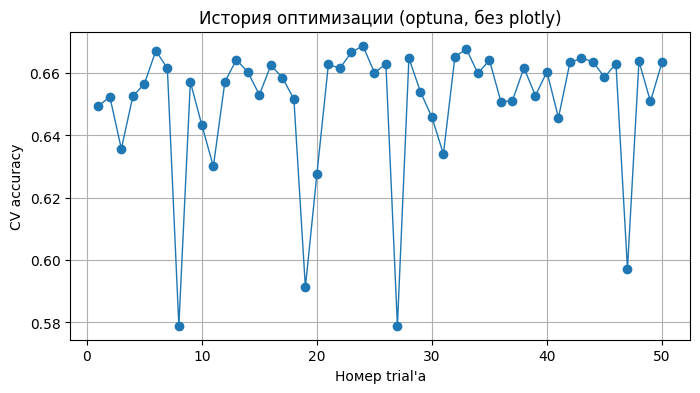


Test accuracy: 0.6785

Classification report:
              precision    recall  f1-score   support

           1       0.64      0.38      0.48       193
           2       0.68      0.85      0.75      1136
           3       0.70      0.48      0.57       671

    accuracy                           0.68      2000
   macro avg       0.67      0.57      0.60      2000
weighted avg       0.68      0.68      0.66      2000



In [67]:
import plotly
from plotly import __version__ as plotly_version
print(plotly.__version__)
from optuna.visualization import plot_optimization_history
# это были попытки поправить какую-то ошибку, но по итогу нашёлся обходной путь

# график истории оптимизации
values = [t.value for t in study.trials if t.value is not None]

plt.figure(figsize=(8, 4))
plt.plot(range(1, len(values) + 1), values, marker="o", linewidth=1)
plt.xlabel("Номер trial'а")
plt.ylabel("CV accuracy")   # или другая метрика, смотря что возвращает objective
plt.title("История оптимизации (optuna, без plotly)")
plt.grid(True)
plt.show()

#Обучаем финальную модель на лучших параметрах 
best_params = study.best_params.copy()
best_params.update({"n_jobs": -1, "random_state": None})

best_rf = RandomForestClassifier(**best_params)
best_rf.fit(X_train, y_train)

# Оценка качества на тесте
y_pred = best_rf.predict(X_test)
test_acc = accuracy_score(y_test, y_pred)
print(f"\nTest accuracy: {test_acc:.4f}\n")

print("Classification report:")
print(classification_report(y_test, y_pred))

Теперь создайте лес самостоятельно. Для этого используйте [Бэггинг](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html) для создания классификатора на основе [Дерева решений](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html). Задайте параметры, аналогичные лесу выше

In [68]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Параметры, которые optuna нашла для RandomForestClassifier
best_rf_params = study.best_params
print("Best RF params:", best_rf_params)

best_rf_params.update({"n_jobs": -1, "random_state": 42})

rf_clf = RandomForestClassifier(**best_rf_params)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=None)

rf_cv_scores = cross_val_score(rf_clf, X_train, y_train, cv=cv, scoring="accuracy", n_jobs=-1)


print(f"RF CV accuracy: {rf_cv_scores.mean():.4f} ± {rf_cv_scores.std():.4f}")

rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
rf_test_acc = accuracy_score(y_test, y_pred_rf)
print(f"RF test accuracy: {rf_test_acc:.4f}")


# Базовое дерево с аналогичными параметрами
base_tree = DecisionTreeClassifier(
    max_depth=best_rf_params.get("max_depth", None),
    min_samples_split=best_rf_params.get("min_samples_split", 2),
    min_samples_leaf=best_rf_params.get("min_samples_leaf", 1),
    max_features=best_rf_params.get("max_features", None),
    random_state=None,
)

# Бэггинг-ансамбль "вместо" леса
bag_clf = BaggingClassifier(
    estimator=base_tree,             # в новых sklearn параметр называется estimator(Оно иначе варнингами сыпало)
    n_estimators=best_rf_params.get("n_estimators", 200),
    bootstrap=best_rf_params.get("bootstrap", True),
    n_jobs=-1,
    random_state=None,
)

# Оценка по кросс-валидации (чтобы сравнить с RF)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=None)
cv_scores = cross_val_score(bag_clf, X_train, y_train, cv=cv, scoring="accuracy", n_jobs=-1)
print(f"Bagging CV accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")
bag_cv_scores = cross_val_score(bag_clf, X_train, y_train, cv=cv,
                                scoring="accuracy", n_jobs=-1)

print(f"Bagging CV accuracy: {bag_cv_scores.mean():.4f} ± {bag_cv_scores.std():.4f}")

bag_clf.fit(X_train, y_train)
y_pred_bag = bag_clf.predict(X_test)
bag_test_acc = accuracy_score(y_test, y_pred_bag)
print(f"Bagging test accuracy: {bag_test_acc:.4f}")
# 4) Обучаем на train и смотрим тест
bag_clf.fit(X_train, y_train)
y_pred_bag = bag_clf.predict(X_test)

test_acc_bag = accuracy_score(y_test, y_pred_bag)
print(f"\nBagging test accuracy: {test_acc_bag:.4f}\n")
print("Bagging classification report:")
print(classification_report(y_test, y_pred_bag))

Best RF params: {'n_estimators': 214, 'max_depth': 18, 'min_samples_split': 12, 'min_samples_leaf': 2, 'max_features': None, 'bootstrap': True}
RF CV accuracy: 0.6630 ± 0.0042
RF test accuracy: 0.6715
Bagging CV accuracy: 0.6610 ± 0.0159
Bagging CV accuracy: 0.6663 ± 0.0095
Bagging test accuracy: 0.6790

Bagging test accuracy: 0.6770

Bagging classification report:
              precision    recall  f1-score   support

           1       0.61      0.38      0.47       193
           2       0.68      0.84      0.75      1136
           3       0.70      0.48      0.57       671

    accuracy                           0.68      2000
   macro avg       0.66      0.57      0.60      2000
weighted avg       0.68      0.68      0.66      2000



Сравните Случайный лес и «Мешок деревьев»

In [69]:
results = pd.DataFrame({
    "model": ["RandomForest", "Bagging+Tree"],
    "cv_mean_acc": [rf_cv_scores.mean(), bag_cv_scores.mean()],
    "cv_std_acc":  [rf_cv_scores.std(),  bag_cv_scores.std()],
    "test_acc":    [rf_test_acc,         bag_test_acc],
})

print(results)

          model  cv_mean_acc  cv_std_acc  test_acc
0  RandomForest      0.66300    0.004172    0.6715
1  Bagging+Tree      0.66625    0.009462    0.6790


**Вопрос:** Какой из методов оказался лучше? Предположите почему? 

Они примерно одинаковые. с такими малыми различиями трудно сказать, кто из них лучше на текущий момент

Теперь выберите любой другой известный вам метод (кроме дерева и леса). Постройте [Бэггинг](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html) на его оснвое. Подберите гиперпараметры у исходного метода и его Бэггинга

In [70]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, classification_report

# Оптимизация "голого" SVCa

def objective_svc(trial):
    # фиксируем kernel='rbf', чтобы не раздувать пространство поиска
    C = trial.suggest_loguniform("C", 1e-2, 1e2)
    gamma = trial.suggest_loguniform("gamma", 1e-4, 1e0)

    svc = SVC(
        kernel="rbf",
        C=C,
        gamma=gamma,
        class_weight="balanced",   # можно убрать, если классы ровные, но это не наш случай
        probability=False,
        random_state=None,
    )

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=None)
    scores = cross_val_score(svc, X_train, y_train, cv=cv, scoring="accuracy", n_jobs=-1)
    return scores.mean()

study_svc = optuna.create_study(direction="maximize")
study_svc.optimize(objective_svc, n_trials=40, show_progress_bar=True)

print("Best SVC value (CV accuracy):", study_svc.best_value)
print("Best SVC params:", study_svc.best_params)

best_svc_params = study_svc.best_params.copy()
best_svc = SVC(
    kernel="rbf",
    class_weight="balanced",
    probability=False,
    random_state=None,
    **best_svc_params,
)

best_svc.fit(X_train, y_train)
y_pred_svc = best_svc.predict(X_test)
svc_test_acc = accuracy_score(y_test, y_pred_svc)

print(f"\nSVC test accuracy: {svc_test_acc:.4f}\n")
print("SVC classification report:")
print(classification_report(y_test, y_pred_svc))

[I 2025-11-15 12:25:05,831] A new study created in memory with name: no-name-5e06a771-3936-4a57-b85c-5eecca01c905
  0%|          | 0/40 [00:00<?, ?it/s]/var/folders/d4/pdhkc1y53l5bywltpcg3j0cm0000gp/T/ipykernel_75023/3598726585.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-2, 1e2)
/var/folders/d4/pdhkc1y53l5bywltpcg3j0cm0000gp/T/ipykernel_75023/3598726585.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform("gamma", 1e-4, 1e0)
Best trial: 0. Best value: 0.5215:   2%|▎         | 1/40 [00:02<01:24,  2.15s/it]/var/folders/d4/pdhkc1y53l5bywltpcg3j0cm0000gp/T/ipykernel_75023/3598726585.py:9: FutureWa

[I 2025-11-15 12:25:07,993] Trial 0 finished with value: 0.5215 and parameters: {'C': 0.352442377591949, 'gamma': 0.003776936640154046}. Best is trial 0 with value: 0.5215.


Best trial: 1. Best value: 0.568125:   5%|▌         | 2/40 [00:04<01:26,  2.26s/it]/var/folders/d4/pdhkc1y53l5bywltpcg3j0cm0000gp/T/ipykernel_75023/3598726585.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-2, 1e2)
/var/folders/d4/pdhkc1y53l5bywltpcg3j0cm0000gp/T/ipykernel_75023/3598726585.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform("gamma", 1e-4, 1e0)


[I 2025-11-15 12:25:10,331] Trial 1 finished with value: 0.568125 and parameters: {'C': 2.348478773040169, 'gamma': 0.00012035856535112911}. Best is trial 1 with value: 0.568125.


Best trial: 1. Best value: 0.568125:   8%|▊         | 3/40 [00:06<01:23,  2.26s/it]/var/folders/d4/pdhkc1y53l5bywltpcg3j0cm0000gp/T/ipykernel_75023/3598726585.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-2, 1e2)
/var/folders/d4/pdhkc1y53l5bywltpcg3j0cm0000gp/T/ipykernel_75023/3598726585.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform("gamma", 1e-4, 1e0)


[I 2025-11-15 12:25:12,585] Trial 2 finished with value: 0.568125 and parameters: {'C': 83.0585527235237, 'gamma': 0.16542257037166835}. Best is trial 1 with value: 0.568125.


Best trial: 1. Best value: 0.568125:  10%|█         | 4/40 [00:08<01:16,  2.13s/it]/var/folders/d4/pdhkc1y53l5bywltpcg3j0cm0000gp/T/ipykernel_75023/3598726585.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-2, 1e2)
/var/folders/d4/pdhkc1y53l5bywltpcg3j0cm0000gp/T/ipykernel_75023/3598726585.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform("gamma", 1e-4, 1e0)


[I 2025-11-15 12:25:14,529] Trial 3 finished with value: 0.3355 and parameters: {'C': 0.35959987192524245, 'gamma': 0.002133104858456334}. Best is trial 1 with value: 0.568125.


Best trial: 1. Best value: 0.568125:  12%|█▎        | 5/40 [00:10<01:15,  2.16s/it]/var/folders/d4/pdhkc1y53l5bywltpcg3j0cm0000gp/T/ipykernel_75023/3598726585.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-2, 1e2)
/var/folders/d4/pdhkc1y53l5bywltpcg3j0cm0000gp/T/ipykernel_75023/3598726585.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform("gamma", 1e-4, 1e0)


[I 2025-11-15 12:25:16,741] Trial 4 finished with value: 0.568125 and parameters: {'C': 3.8191690019272224, 'gamma': 0.19596249115821326}. Best is trial 1 with value: 0.568125.


Best trial: 1. Best value: 0.568125:  15%|█▌        | 6/40 [00:12<01:12,  2.13s/it]/var/folders/d4/pdhkc1y53l5bywltpcg3j0cm0000gp/T/ipykernel_75023/3598726585.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-2, 1e2)
/var/folders/d4/pdhkc1y53l5bywltpcg3j0cm0000gp/T/ipykernel_75023/3598726585.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform("gamma", 1e-4, 1e0)


[I 2025-11-15 12:25:18,817] Trial 5 finished with value: 0.382125 and parameters: {'C': 0.7099295856854702, 'gamma': 0.04310993650317742}. Best is trial 1 with value: 0.568125.


Best trial: 1. Best value: 0.568125:  18%|█▊        | 7/40 [00:14<01:08,  2.06s/it]/var/folders/d4/pdhkc1y53l5bywltpcg3j0cm0000gp/T/ipykernel_75023/3598726585.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-2, 1e2)
/var/folders/d4/pdhkc1y53l5bywltpcg3j0cm0000gp/T/ipykernel_75023/3598726585.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform("gamma", 1e-4, 1e0)


[I 2025-11-15 12:25:20,734] Trial 6 finished with value: 0.382125 and parameters: {'C': 0.2064753673716607, 'gamma': 0.102239032946703}. Best is trial 1 with value: 0.568125.


Best trial: 1. Best value: 0.568125:  20%|██        | 8/40 [00:16<01:05,  2.06s/it]/var/folders/d4/pdhkc1y53l5bywltpcg3j0cm0000gp/T/ipykernel_75023/3598726585.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-2, 1e2)
/var/folders/d4/pdhkc1y53l5bywltpcg3j0cm0000gp/T/ipykernel_75023/3598726585.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform("gamma", 1e-4, 1e0)


[I 2025-11-15 12:25:22,782] Trial 7 finished with value: 0.568125 and parameters: {'C': 0.9156137762791067, 'gamma': 0.01547349729644711}. Best is trial 1 with value: 0.568125.


Best trial: 1. Best value: 0.568125:  22%|██▎       | 9/40 [00:19<01:06,  2.13s/it]/var/folders/d4/pdhkc1y53l5bywltpcg3j0cm0000gp/T/ipykernel_75023/3598726585.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-2, 1e2)
/var/folders/d4/pdhkc1y53l5bywltpcg3j0cm0000gp/T/ipykernel_75023/3598726585.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform("gamma", 1e-4, 1e0)


[I 2025-11-15 12:25:25,076] Trial 8 finished with value: 0.568125 and parameters: {'C': 33.627749112957325, 'gamma': 0.0016010907331823214}. Best is trial 1 with value: 0.568125.


Best trial: 1. Best value: 0.568125:  25%|██▌       | 10/40 [00:21<01:01,  2.06s/it]/var/folders/d4/pdhkc1y53l5bywltpcg3j0cm0000gp/T/ipykernel_75023/3598726585.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-2, 1e2)
/var/folders/d4/pdhkc1y53l5bywltpcg3j0cm0000gp/T/ipykernel_75023/3598726585.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform("gamma", 1e-4, 1e0)


[I 2025-11-15 12:25:26,974] Trial 9 finished with value: 0.287875 and parameters: {'C': 0.018315353215696755, 'gamma': 0.2959151806150608}. Best is trial 1 with value: 0.568125.


Best trial: 1. Best value: 0.568125:  28%|██▊       | 11/40 [00:23<01:01,  2.11s/it]/var/folders/d4/pdhkc1y53l5bywltpcg3j0cm0000gp/T/ipykernel_75023/3598726585.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-2, 1e2)
/var/folders/d4/pdhkc1y53l5bywltpcg3j0cm0000gp/T/ipykernel_75023/3598726585.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform("gamma", 1e-4, 1e0)


[I 2025-11-15 12:25:29,188] Trial 10 finished with value: 0.568125 and parameters: {'C': 6.462558774973308, 'gamma': 0.00010659220840781779}. Best is trial 1 with value: 0.568125.


Best trial: 1. Best value: 0.568125:  30%|███       | 12/40 [00:25<00:59,  2.14s/it]/var/folders/d4/pdhkc1y53l5bywltpcg3j0cm0000gp/T/ipykernel_75023/3598726585.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-2, 1e2)
/var/folders/d4/pdhkc1y53l5bywltpcg3j0cm0000gp/T/ipykernel_75023/3598726585.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform("gamma", 1e-4, 1e0)


[I 2025-11-15 12:25:31,404] Trial 11 finished with value: 0.568125 and parameters: {'C': 93.60266303134927, 'gamma': 0.0002140109640339691}. Best is trial 1 with value: 0.568125.


Best trial: 1. Best value: 0.568125:  32%|███▎      | 13/40 [00:27<00:58,  2.16s/it]/var/folders/d4/pdhkc1y53l5bywltpcg3j0cm0000gp/T/ipykernel_75023/3598726585.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-2, 1e2)
/var/folders/d4/pdhkc1y53l5bywltpcg3j0cm0000gp/T/ipykernel_75023/3598726585.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform("gamma", 1e-4, 1e0)


[I 2025-11-15 12:25:33,624] Trial 12 finished with value: 0.568125 and parameters: {'C': 10.188474825530403, 'gamma': 0.8466360499739493}. Best is trial 1 with value: 0.568125.


Best trial: 1. Best value: 0.568125:  35%|███▌      | 14/40 [00:29<00:54,  2.09s/it]/var/folders/d4/pdhkc1y53l5bywltpcg3j0cm0000gp/T/ipykernel_75023/3598726585.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-2, 1e2)
/var/folders/d4/pdhkc1y53l5bywltpcg3j0cm0000gp/T/ipykernel_75023/3598726585.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform("gamma", 1e-4, 1e0)


[I 2025-11-15 12:25:35,559] Trial 13 finished with value: 0.287875 and parameters: {'C': 0.035664137928937995, 'gamma': 0.0007866484576499894}. Best is trial 1 with value: 0.568125.


Best trial: 1. Best value: 0.568125:  38%|███▊      | 15/40 [00:31<00:53,  2.14s/it]/var/folders/d4/pdhkc1y53l5bywltpcg3j0cm0000gp/T/ipykernel_75023/3598726585.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-2, 1e2)
/var/folders/d4/pdhkc1y53l5bywltpcg3j0cm0000gp/T/ipykernel_75023/3598726585.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform("gamma", 1e-4, 1e0)


[I 2025-11-15 12:25:37,794] Trial 14 finished with value: 0.568125 and parameters: {'C': 28.032050102129766, 'gamma': 0.015920663797878737}. Best is trial 1 with value: 0.568125.


Best trial: 1. Best value: 0.568125:  40%|████      | 16/40 [00:34<00:51,  2.16s/it]/var/folders/d4/pdhkc1y53l5bywltpcg3j0cm0000gp/T/ipykernel_75023/3598726585.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-2, 1e2)
/var/folders/d4/pdhkc1y53l5bywltpcg3j0cm0000gp/T/ipykernel_75023/3598726585.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform("gamma", 1e-4, 1e0)


[I 2025-11-15 12:25:40,011] Trial 15 finished with value: 0.568125 and parameters: {'C': 2.836252657747186, 'gamma': 0.00046201796491218537}. Best is trial 1 with value: 0.568125.


Best trial: 1. Best value: 0.568125:  42%|████▎     | 17/40 [00:36<00:48,  2.09s/it]/var/folders/d4/pdhkc1y53l5bywltpcg3j0cm0000gp/T/ipykernel_75023/3598726585.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-2, 1e2)
/var/folders/d4/pdhkc1y53l5bywltpcg3j0cm0000gp/T/ipykernel_75023/3598726585.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform("gamma", 1e-4, 1e0)


[I 2025-11-15 12:25:41,943] Trial 16 finished with value: 0.3355 and parameters: {'C': 0.08125070760420666, 'gamma': 0.006534080592550622}. Best is trial 1 with value: 0.568125.


Best trial: 1. Best value: 0.568125:  45%|████▌     | 18/40 [00:38<00:47,  2.14s/it]/var/folders/d4/pdhkc1y53l5bywltpcg3j0cm0000gp/T/ipykernel_75023/3598726585.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-2, 1e2)
/var/folders/d4/pdhkc1y53l5bywltpcg3j0cm0000gp/T/ipykernel_75023/3598726585.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform("gamma", 1e-4, 1e0)


[I 2025-11-15 12:25:44,187] Trial 17 finished with value: 0.568125 and parameters: {'C': 93.65551433654888, 'gamma': 0.05205585042305372}. Best is trial 1 with value: 0.568125.


Best trial: 1. Best value: 0.568125:  48%|████▊     | 19/40 [00:40<00:45,  2.16s/it]/var/folders/d4/pdhkc1y53l5bywltpcg3j0cm0000gp/T/ipykernel_75023/3598726585.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-2, 1e2)
/var/folders/d4/pdhkc1y53l5bywltpcg3j0cm0000gp/T/ipykernel_75023/3598726585.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform("gamma", 1e-4, 1e0)


[I 2025-11-15 12:25:46,401] Trial 18 finished with value: 0.568125 and parameters: {'C': 19.483578027498393, 'gamma': 0.5074260992813538}. Best is trial 1 with value: 0.568125.


Best trial: 1. Best value: 0.568125:  50%|█████     | 20/40 [00:42<00:41,  2.10s/it]/var/folders/d4/pdhkc1y53l5bywltpcg3j0cm0000gp/T/ipykernel_75023/3598726585.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-2, 1e2)
/var/folders/d4/pdhkc1y53l5bywltpcg3j0cm0000gp/T/ipykernel_75023/3598726585.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform("gamma", 1e-4, 1e0)


[I 2025-11-15 12:25:48,345] Trial 19 finished with value: 0.144 and parameters: {'C': 0.10635947463809914, 'gamma': 0.05277097335646129}. Best is trial 1 with value: 0.568125.


Best trial: 1. Best value: 0.568125:  52%|█████▎    | 21/40 [00:44<00:40,  2.14s/it]/var/folders/d4/pdhkc1y53l5bywltpcg3j0cm0000gp/T/ipykernel_75023/3598726585.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-2, 1e2)
/var/folders/d4/pdhkc1y53l5bywltpcg3j0cm0000gp/T/ipykernel_75023/3598726585.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform("gamma", 1e-4, 1e0)


[I 2025-11-15 12:25:50,589] Trial 20 finished with value: 0.568125 and parameters: {'C': 2.267661661165858, 'gamma': 0.006961186882940575}. Best is trial 1 with value: 0.568125.


Best trial: 1. Best value: 0.568125:  55%|█████▌    | 22/40 [00:46<00:39,  2.17s/it]/var/folders/d4/pdhkc1y53l5bywltpcg3j0cm0000gp/T/ipykernel_75023/3598726585.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-2, 1e2)
/var/folders/d4/pdhkc1y53l5bywltpcg3j0cm0000gp/T/ipykernel_75023/3598726585.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform("gamma", 1e-4, 1e0)


[I 2025-11-15 12:25:52,822] Trial 21 finished with value: 0.568125 and parameters: {'C': 3.142412650494007, 'gamma': 0.11848333122607392}. Best is trial 1 with value: 0.568125.


Best trial: 1. Best value: 0.568125:  57%|█████▊    | 23/40 [00:49<00:37,  2.19s/it]/var/folders/d4/pdhkc1y53l5bywltpcg3j0cm0000gp/T/ipykernel_75023/3598726585.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-2, 1e2)
/var/folders/d4/pdhkc1y53l5bywltpcg3j0cm0000gp/T/ipykernel_75023/3598726585.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform("gamma", 1e-4, 1e0)


[I 2025-11-15 12:25:55,066] Trial 22 finished with value: 0.568125 and parameters: {'C': 7.019533048478156, 'gamma': 0.21916949917563455}. Best is trial 1 with value: 0.568125.


Best trial: 1. Best value: 0.568125:  60%|██████    | 24/40 [00:51<00:35,  2.21s/it]/var/folders/d4/pdhkc1y53l5bywltpcg3j0cm0000gp/T/ipykernel_75023/3598726585.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-2, 1e2)
/var/folders/d4/pdhkc1y53l5bywltpcg3j0cm0000gp/T/ipykernel_75023/3598726585.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform("gamma", 1e-4, 1e0)


[I 2025-11-15 12:25:57,306] Trial 23 finished with value: 0.568125 and parameters: {'C': 1.5250376459117398, 'gamma': 0.029350768557746054}. Best is trial 1 with value: 0.568125.


Best trial: 1. Best value: 0.568125:  62%|██████▎   | 25/40 [00:53<00:33,  2.22s/it]/var/folders/d4/pdhkc1y53l5bywltpcg3j0cm0000gp/T/ipykernel_75023/3598726585.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-2, 1e2)
/var/folders/d4/pdhkc1y53l5bywltpcg3j0cm0000gp/T/ipykernel_75023/3598726585.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform("gamma", 1e-4, 1e0)


[I 2025-11-15 12:25:59,551] Trial 24 finished with value: 0.568125 and parameters: {'C': 13.89905047517789, 'gamma': 0.15061507648463515}. Best is trial 1 with value: 0.568125.


Best trial: 1. Best value: 0.568125:  65%|██████▌   | 26/40 [00:55<00:31,  2.23s/it]/var/folders/d4/pdhkc1y53l5bywltpcg3j0cm0000gp/T/ipykernel_75023/3598726585.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-2, 1e2)
/var/folders/d4/pdhkc1y53l5bywltpcg3j0cm0000gp/T/ipykernel_75023/3598726585.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform("gamma", 1e-4, 1e0)


[I 2025-11-15 12:26:01,803] Trial 25 finished with value: 0.568125 and parameters: {'C': 4.254234519735012, 'gamma': 0.3492873716021261}. Best is trial 1 with value: 0.568125.


Best trial: 1. Best value: 0.568125:  68%|██████▊   | 27/40 [00:58<00:28,  2.23s/it]/var/folders/d4/pdhkc1y53l5bywltpcg3j0cm0000gp/T/ipykernel_75023/3598726585.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-2, 1e2)
/var/folders/d4/pdhkc1y53l5bywltpcg3j0cm0000gp/T/ipykernel_75023/3598726585.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform("gamma", 1e-4, 1e0)


[I 2025-11-15 12:26:04,033] Trial 26 finished with value: 0.568125 and parameters: {'C': 51.720136941669686, 'gamma': 0.7390163788382947}. Best is trial 1 with value: 0.568125.


Best trial: 1. Best value: 0.568125:  70%|███████   | 28/40 [01:00<00:26,  2.18s/it]/var/folders/d4/pdhkc1y53l5bywltpcg3j0cm0000gp/T/ipykernel_75023/3598726585.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-2, 1e2)
/var/folders/d4/pdhkc1y53l5bywltpcg3j0cm0000gp/T/ipykernel_75023/3598726585.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform("gamma", 1e-4, 1e0)


[I 2025-11-15 12:26:06,112] Trial 27 finished with value: 0.3355 and parameters: {'C': 0.669738633763426, 'gamma': 0.09043327095084117}. Best is trial 1 with value: 0.568125.


Best trial: 1. Best value: 0.568125:  72%|███████▎  | 29/40 [01:02<00:24,  2.20s/it]/var/folders/d4/pdhkc1y53l5bywltpcg3j0cm0000gp/T/ipykernel_75023/3598726585.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-2, 1e2)
/var/folders/d4/pdhkc1y53l5bywltpcg3j0cm0000gp/T/ipykernel_75023/3598726585.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform("gamma", 1e-4, 1e0)


[I 2025-11-15 12:26:08,365] Trial 28 finished with value: 0.568125 and parameters: {'C': 6.681013471113013, 'gamma': 0.025173207114357984}. Best is trial 1 with value: 0.568125.


Best trial: 1. Best value: 0.568125:  75%|███████▌  | 30/40 [01:04<00:21,  2.12s/it]/var/folders/d4/pdhkc1y53l5bywltpcg3j0cm0000gp/T/ipykernel_75023/3598726585.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-2, 1e2)
/var/folders/d4/pdhkc1y53l5bywltpcg3j0cm0000gp/T/ipykernel_75023/3598726585.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform("gamma", 1e-4, 1e0)


[I 2025-11-15 12:26:10,286] Trial 29 finished with value: 0.3355 and parameters: {'C': 0.42116919929902175, 'gamma': 0.0036872180666473573}. Best is trial 1 with value: 0.568125.


Best trial: 1. Best value: 0.568125:  78%|███████▊  | 31/40 [01:06<00:18,  2.10s/it]/var/folders/d4/pdhkc1y53l5bywltpcg3j0cm0000gp/T/ipykernel_75023/3598726585.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-2, 1e2)
/var/folders/d4/pdhkc1y53l5bywltpcg3j0cm0000gp/T/ipykernel_75023/3598726585.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform("gamma", 1e-4, 1e0)


[I 2025-11-15 12:26:12,341] Trial 30 finished with value: 0.568125 and parameters: {'C': 1.1956510385608023, 'gamma': 0.0006253889144985772}. Best is trial 1 with value: 0.568125.


Best trial: 1. Best value: 0.568125:  80%|████████  | 32/40 [01:08<00:17,  2.14s/it]/var/folders/d4/pdhkc1y53l5bywltpcg3j0cm0000gp/T/ipykernel_75023/3598726585.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-2, 1e2)
/var/folders/d4/pdhkc1y53l5bywltpcg3j0cm0000gp/T/ipykernel_75023/3598726585.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform("gamma", 1e-4, 1e0)


[I 2025-11-15 12:26:14,567] Trial 31 finished with value: 0.568125 and parameters: {'C': 1.6704003437630415, 'gamma': 0.011261751118776447}. Best is trial 1 with value: 0.568125.


Best trial: 1. Best value: 0.568125:  82%|████████▎ | 33/40 [01:10<00:14,  2.07s/it]/var/folders/d4/pdhkc1y53l5bywltpcg3j0cm0000gp/T/ipykernel_75023/3598726585.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-2, 1e2)
/var/folders/d4/pdhkc1y53l5bywltpcg3j0cm0000gp/T/ipykernel_75023/3598726585.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform("gamma", 1e-4, 1e0)


[I 2025-11-15 12:26:16,471] Trial 32 finished with value: 0.144 and parameters: {'C': 0.23652870422447597, 'gamma': 0.001664015382121792}. Best is trial 1 with value: 0.568125.


Best trial: 1. Best value: 0.568125:  85%|████████▌ | 34/40 [01:12<00:12,  2.07s/it]/var/folders/d4/pdhkc1y53l5bywltpcg3j0cm0000gp/T/ipykernel_75023/3598726585.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-2, 1e2)
/var/folders/d4/pdhkc1y53l5bywltpcg3j0cm0000gp/T/ipykernel_75023/3598726585.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform("gamma", 1e-4, 1e0)


[I 2025-11-15 12:26:18,543] Trial 33 finished with value: 0.3355 and parameters: {'C': 0.8477895002350998, 'gamma': 0.003434081303950387}. Best is trial 1 with value: 0.568125.


Best trial: 1. Best value: 0.568125:  88%|████████▊ | 35/40 [01:14<00:10,  2.07s/it]/var/folders/d4/pdhkc1y53l5bywltpcg3j0cm0000gp/T/ipykernel_75023/3598726585.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-2, 1e2)
/var/folders/d4/pdhkc1y53l5bywltpcg3j0cm0000gp/T/ipykernel_75023/3598726585.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform("gamma", 1e-4, 1e0)


[I 2025-11-15 12:26:20,599] Trial 34 finished with value: 0.568125 and parameters: {'C': 0.5344251867954118, 'gamma': 0.07008834035374928}. Best is trial 1 with value: 0.568125.


Best trial: 1. Best value: 0.568125:  90%|█████████ | 36/40 [01:16<00:08,  2.02s/it]/var/folders/d4/pdhkc1y53l5bywltpcg3j0cm0000gp/T/ipykernel_75023/3598726585.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-2, 1e2)
/var/folders/d4/pdhkc1y53l5bywltpcg3j0cm0000gp/T/ipykernel_75023/3598726585.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform("gamma", 1e-4, 1e0)


[I 2025-11-15 12:26:22,499] Trial 35 finished with value: 0.190625 and parameters: {'C': 0.1491193560242888, 'gamma': 0.21245318731369964}. Best is trial 1 with value: 0.568125.


Best trial: 1. Best value: 0.568125:  92%|█████████▎| 37/40 [01:18<00:06,  2.07s/it]/var/folders/d4/pdhkc1y53l5bywltpcg3j0cm0000gp/T/ipykernel_75023/3598726585.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-2, 1e2)
/var/folders/d4/pdhkc1y53l5bywltpcg3j0cm0000gp/T/ipykernel_75023/3598726585.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform("gamma", 1e-4, 1e0)


[I 2025-11-15 12:26:24,696] Trial 36 finished with value: 0.568125 and parameters: {'C': 49.70403152021012, 'gamma': 0.024638323193815568}. Best is trial 1 with value: 0.568125.


Best trial: 1. Best value: 0.568125:  95%|█████████▌| 38/40 [01:21<00:04,  2.12s/it]/var/folders/d4/pdhkc1y53l5bywltpcg3j0cm0000gp/T/ipykernel_75023/3598726585.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-2, 1e2)
/var/folders/d4/pdhkc1y53l5bywltpcg3j0cm0000gp/T/ipykernel_75023/3598726585.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform("gamma", 1e-4, 1e0)


[I 2025-11-15 12:26:26,926] Trial 37 finished with value: 0.568125 and parameters: {'C': 4.44277127539276, 'gamma': 0.00011107744997217422}. Best is trial 1 with value: 0.568125.


Best trial: 1. Best value: 0.568125:  98%|█████████▊| 39/40 [01:22<00:02,  2.05s/it]/var/folders/d4/pdhkc1y53l5bywltpcg3j0cm0000gp/T/ipykernel_75023/3598726585.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 1e-2, 1e2)
/var/folders/d4/pdhkc1y53l5bywltpcg3j0cm0000gp/T/ipykernel_75023/3598726585.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform("gamma", 1e-4, 1e0)


[I 2025-11-15 12:26:28,823] Trial 38 finished with value: 0.096375 and parameters: {'C': 0.24272097674564225, 'gamma': 0.036479833653728234}. Best is trial 1 with value: 0.568125.


Best trial: 1. Best value: 0.568125: 100%|██████████| 40/40 [01:25<00:00,  2.13s/it]


[I 2025-11-15 12:26:30,869] Trial 39 finished with value: 0.3355 and parameters: {'C': 0.9531177871329317, 'gamma': 0.4480981107445109}. Best is trial 1 with value: 0.568125.
Best SVC value (CV accuracy): 0.568125
Best SVC params: {'C': 2.348478773040169, 'gamma': 0.00012035856535112911}

SVC test accuracy: 0.5680

SVC classification report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       193
           2       0.57      1.00      0.72      1136
           3       0.00      0.00      0.00       671

    accuracy                           0.57      2000
   macro avg       0.19      0.33      0.24      2000
weighted avg       0.32      0.57      0.41      2000



/Users/zuha/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/zuha/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/zuha/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


Чтобы не было варнингов, надо преписать через pipeline, ниже сделано, сюда просто не добрался

Сравните три полученные модели

In [71]:
results = pd.DataFrame({
    "model": ["RandomForest", "Bagging+Tree", "SVC"],
    "cv_mean_acc": [
        rf_cv_scores.mean(),          # RF: средняя точность по CV
        bag_cv_scores.mean(),         # Bagging+Tree: средняя точность по CV
        study_svc.best_value,         # SVC: лучшая средняя CV-точность из Optuna
    ],
    "cv_std_acc": [
        rf_cv_scores.std(),           # RF: разброс по фолдам
        bag_cv_scores.std(),          # Bagging+Tree: разброс по фолдам
        None,                         
    ],
    "test_acc": [
        rf_test_acc,                  # RF: точность на тесте
        test_acc_bag,                 # Bagging+Tree: точность на тесте
        svc_test_acc,                 # SVC: точность на тесте
    ],
})

print(results)

          model  cv_mean_acc  cv_std_acc  test_acc
0  RandomForest     0.663000    0.004172    0.6715
1  Bagging+Tree     0.666250    0.009462    0.6770
2           SVC     0.568125         NaN    0.5680


**Вопрос:** Какие модели у вас получились? Какая из них оказалась лучшей? Предположите почему?

Деревья с бэггингом и случайный лес по факту равны. В целом, члучайный лес хорошо себя показывает на дисбалансных классах, не требователен к нормализации. Взамен прожорлив

## Задача 4

Теперь разберёмся подробнее с Блендингом. Как вы помните, в отличии от Бэггинга, Блендинг это объединение разных моделей, для каждой из них нужно производить подбор гиперпараметров, потому, Блендинг имеет смысл использовать когда у вас есть несколько обученных моделей, каждая из которых хорошо работает на какой-то части данных, например, каждая из моделей умеет идеально предсказывать один из классов, таким образом, в Блендинге модели будут дополнять друг друга

Загрузите датасет *richters_whole_1.csv*

In [72]:
df = pd.read_csv("richters_whole_1.csv")
print(f"Shape: {df.shape}")
print("Columns:", list(df.columns))

display(df.head())

print("\nDtypes:")
print(df.dtypes)

Shape: (17500, 41)
Columns: ['Unnamed: 0', 'building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id', 'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage', 'land_surface_condition', 'foundation_type', 'roof_type', 'ground_floor_type', 'other_floor_type', 'position', 'plan_configuration', 'has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag', 'has_superstructure_cement_mortar_stone', 'has_superstructure_mud_mortar_brick', 'has_superstructure_cement_mortar_brick', 'has_superstructure_timber', 'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered', 'has_superstructure_rc_engineered', 'has_superstructure_other', 'legal_ownership_status', 'count_families', 'has_secondary_use', 'has_secondary_use_agriculture', 'has_secondary_use_hotel', 'has_secondary_use_rental', 'has_secondary_use_institution', 'has_secondary_use_school', 'has_secondary_use_industry', 'has_secondary_use_health_post', 'has_secondary_use_

,Unnamed: 0,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,0,15263,13,526,6992,2,10,11,7,t,...,0,0,0,0,0,0,0,0,0,2
1,1,561922,20,1209,8065,1,20,9,3,t,...,0,0,0,0,0,0,0,0,0,2
2,2,826019,20,385,11212,2,20,9,5,o,...,0,0,0,0,0,0,0,0,0,2
3,3,167002,10,151,60,3,0,5,7,n,...,0,0,0,0,0,0,0,0,0,2
4,4,271970,1,987,5162,2,10,3,5,n,...,0,0,0,0,0,0,0,0,0,1



Dtypes:
Unnamed: 0                                 int64
building_id                                int64
geo_level_1_id                             int64
geo_level_2_id                             int64
geo_level_3_id                             int64
count_floors_pre_eq                        int64
age                                        int64
area_percentage                            int64
height_percentage                          int64
land_surface_condition                    object
foundation_type                           object
roof_type                                 object
ground_floor_type                         object
other_floor_type                          object
position                                  object
plan_configuration                        object
has_superstructure_adobe_mud               int64
has_superstructure_mud_mortar_stone        int64
has_superstructure_stone_flag              int64
has_superstructure_cement_mortar_stone     int64
has_superst

In [73]:
TARGET_COL = "damage_grade" 

y = df[TARGET_COL]
X = df.drop(columns=[TARGET_COL])
X_num = X.copy()
for c in X_num.select_dtypes(include=["object", "category"]).columns:
    X_num[c] = X_num[c].astype("category").cat.codes
    

imp = SimpleImputer(strategy="median")
X_imp = imp.fit_transform(X_num)

Есть два типа блендинга в зависимости от того, как принимается итоговое решение на основе ответов отдельных моделей. Первый это VotingClassifier, по сути взвешанное голосование: каждая модель возвращает вероятности принадлежности классам, после чего общие вероятности пренадлежности классам вычисляются как взвешенная сумма, где веса - веса моделей в Блендинге (их нужно подбирать) 

Используйте две или более разных моделей классификации. Подберите гиперпараметры, оцените качество классификации, произведе диагностику моделей, используя ROC кривую

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X_imp, y, test_size=0.2, stratify=y, random_state=None)

In [75]:
def objective_rf(trial):
    n_estimators = trial.suggest_int("n_estimators", 100, 400)
    max_depth = trial.suggest_int("max_depth", 5, 30)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 20)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 10)
    max_features = trial.suggest_categorical("max_features", ["sqrt", "log2", None])
    bootstrap = trial.suggest_categorical("bootstrap", [True, False])

    rf = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        bootstrap=bootstrap,
        n_jobs=-1,
        random_state=None,
    )

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=None)
    scores = cross_val_score(rf, X_train, y_train, cv=cv, scoring="accuracy", n_jobs=-1)
    return scores.mean()

study_rf = optuna.create_study(direction="maximize")
study_rf.optimize(objective_rf, n_trials=30, show_progress_bar=True)

best_rf_params = study_rf.best_params.copy()
best_rf_params.update({"n_jobs": -1, "random_state": None})

rf_best = RandomForestClassifier(**best_rf_params)
rf_best.fit(X_train, y_train)
y_pred_rf = rf_best.predict(X_test)
rf_acc = accuracy_score(y_test, y_pred_rf)
print("RF test acc:", rf_acc)
print(study_rf.best_params)

[I 2025-11-15 12:26:58,637] A new study created in memory with name: no-name-166cf541-be1e-4cc7-bf81-27e90af30f6c
Best trial: 0. Best value: 0.657143:   3%|▎         | 1/30 [00:02<01:08,  2.38s/it]

[I 2025-11-15 12:27:01,022] Trial 0 finished with value: 0.6571428571428571 and parameters: {'n_estimators': 343, 'max_depth': 17, 'min_samples_split': 16, 'min_samples_leaf': 3, 'max_features': 'log2', 'bootstrap': True}. Best is trial 0 with value: 0.6571428571428571.


Best trial: 0. Best value: 0.657143:   7%|▋         | 2/30 [00:03<00:51,  1.85s/it]

[I 2025-11-15 12:27:02,510] Trial 1 finished with value: 0.6170000000000001 and parameters: {'n_estimators': 279, 'max_depth': 8, 'min_samples_split': 17, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'bootstrap': True}. Best is trial 0 with value: 0.6571428571428571.


Best trial: 2. Best value: 0.661071:  10%|█         | 3/30 [00:04<00:40,  1.51s/it]

[I 2025-11-15 12:27:03,613] Trial 2 finished with value: 0.6610714285714285 and parameters: {'n_estimators': 135, 'max_depth': 22, 'min_samples_split': 4, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'bootstrap': True}. Best is trial 2 with value: 0.6610714285714285.


Best trial: 2. Best value: 0.661071:  13%|█▎        | 4/30 [00:07<00:52,  2.04s/it]

[I 2025-11-15 12:27:06,454] Trial 3 finished with value: 0.6502857142857142 and parameters: {'n_estimators': 374, 'max_depth': 13, 'min_samples_split': 16, 'min_samples_leaf': 7, 'max_features': 'log2', 'bootstrap': False}. Best is trial 2 with value: 0.6610714285714285.


Best trial: 2. Best value: 0.661071:  17%|█▋        | 5/30 [00:09<00:44,  1.77s/it]

[I 2025-11-15 12:27:07,739] Trial 4 finished with value: 0.6410714285714285 and parameters: {'n_estimators': 181, 'max_depth': 12, 'min_samples_split': 10, 'min_samples_leaf': 8, 'max_features': 'log2', 'bootstrap': False}. Best is trial 2 with value: 0.6610714285714285.


Best trial: 2. Best value: 0.661071:  20%|██        | 6/30 [00:24<02:34,  6.42s/it]

[I 2025-11-15 12:27:23,197] Trial 5 finished with value: 0.6234285714285714 and parameters: {'n_estimators': 396, 'max_depth': 13, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_features': None, 'bootstrap': False}. Best is trial 2 with value: 0.6610714285714285.


Best trial: 2. Best value: 0.661071:  23%|██▎       | 7/30 [00:25<01:47,  4.69s/it]

[I 2025-11-15 12:27:24,317] Trial 6 finished with value: 0.5742142857142858 and parameters: {'n_estimators': 319, 'max_depth': 5, 'min_samples_split': 16, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'bootstrap': True}. Best is trial 2 with value: 0.6610714285714285.


Best trial: 2. Best value: 0.661071:  27%|██▋       | 8/30 [00:27<01:26,  3.92s/it]

[I 2025-11-15 12:27:26,608] Trial 7 finished with value: 0.6610714285714285 and parameters: {'n_estimators': 384, 'max_depth': 27, 'min_samples_split': 19, 'min_samples_leaf': 3, 'max_features': 'log2', 'bootstrap': True}. Best is trial 2 with value: 0.6610714285714285.


Best trial: 2. Best value: 0.661071:  30%|███       | 9/30 [00:42<02:30,  7.16s/it]

[I 2025-11-15 12:27:40,893] Trial 8 finished with value: 0.6096428571428572 and parameters: {'n_estimators': 373, 'max_depth': 23, 'min_samples_split': 19, 'min_samples_leaf': 6, 'max_features': None, 'bootstrap': False}. Best is trial 2 with value: 0.6610714285714285.


Best trial: 2. Best value: 0.661071:  33%|███▎      | 10/30 [00:45<01:57,  5.88s/it]

[I 2025-11-15 12:27:43,904] Trial 9 finished with value: 0.6517142857142858 and parameters: {'n_estimators': 376, 'max_depth': 13, 'min_samples_split': 3, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 2 with value: 0.6610714285714285.


Best trial: 10. Best value: 0.664786:  37%|███▋      | 11/30 [00:46<01:22,  4.35s/it]

[I 2025-11-15 12:27:44,786] Trial 10 finished with value: 0.6647857142857143 and parameters: {'n_estimators': 110, 'max_depth': 30, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'bootstrap': True}. Best is trial 10 with value: 0.6647857142857143.


Best trial: 10. Best value: 0.664786:  40%|████      | 12/30 [00:46<00:59,  3.28s/it]

[I 2025-11-15 12:27:45,632] Trial 11 finished with value: 0.663 and parameters: {'n_estimators': 102, 'max_depth': 30, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'bootstrap': True}. Best is trial 10 with value: 0.6647857142857143.


Best trial: 10. Best value: 0.664786:  43%|████▎     | 13/30 [00:47<00:43,  2.55s/it]

[I 2025-11-15 12:27:46,494] Trial 12 finished with value: 0.6641428571428573 and parameters: {'n_estimators': 105, 'max_depth': 30, 'min_samples_split': 7, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'bootstrap': True}. Best is trial 10 with value: 0.6647857142857143.


Best trial: 13. Best value: 0.667286:  47%|████▋     | 14/30 [00:49<00:35,  2.21s/it]

[I 2025-11-15 12:27:47,901] Trial 13 finished with value: 0.6672857142857143 and parameters: {'n_estimators': 190, 'max_depth': 30, 'min_samples_split': 8, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'bootstrap': True}. Best is trial 13 with value: 0.6672857142857143.


Best trial: 13. Best value: 0.667286:  50%|█████     | 15/30 [00:50<00:29,  1.97s/it]

[I 2025-11-15 12:27:49,318] Trial 14 finished with value: 0.6626428571428572 and parameters: {'n_estimators': 196, 'max_depth': 24, 'min_samples_split': 12, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'bootstrap': True}. Best is trial 13 with value: 0.6672857142857143.


Best trial: 15. Best value: 0.668:  53%|█████▎    | 16/30 [00:52<00:25,  1.85s/it]   

[I 2025-11-15 12:27:50,899] Trial 15 finished with value: 0.6679999999999999 and parameters: {'n_estimators': 203, 'max_depth': 27, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'bootstrap': True}. Best is trial 15 with value: 0.6679999999999999.


Best trial: 16. Best value: 0.6745:  57%|█████▋    | 17/30 [00:59<00:43,  3.36s/it]

[I 2025-11-15 12:27:57,778] Trial 16 finished with value: 0.6745 and parameters: {'n_estimators': 231, 'max_depth': 26, 'min_samples_split': 11, 'min_samples_leaf': 2, 'max_features': None, 'bootstrap': True}. Best is trial 16 with value: 0.6745.


Best trial: 17. Best value: 0.676857:  60%|██████    | 18/30 [01:06<00:54,  4.55s/it]

[I 2025-11-15 12:28:05,102] Trial 17 finished with value: 0.6768571428571428 and parameters: {'n_estimators': 252, 'max_depth': 21, 'min_samples_split': 12, 'min_samples_leaf': 2, 'max_features': None, 'bootstrap': True}. Best is trial 17 with value: 0.6768571428571428.


Best trial: 18. Best value: 0.678071:  63%|██████▎   | 19/30 [01:13<00:58,  5.31s/it]

[I 2025-11-15 12:28:12,189] Trial 18 finished with value: 0.6780714285714285 and parameters: {'n_estimators': 246, 'max_depth': 20, 'min_samples_split': 12, 'min_samples_leaf': 2, 'max_features': None, 'bootstrap': True}. Best is trial 18 with value: 0.6780714285714285.


Best trial: 19. Best value: 0.678286:  67%|██████▋   | 20/30 [01:21<00:59,  6.00s/it]

[I 2025-11-15 12:28:19,773] Trial 19 finished with value: 0.6782857142857143 and parameters: {'n_estimators': 267, 'max_depth': 19, 'min_samples_split': 13, 'min_samples_leaf': 2, 'max_features': None, 'bootstrap': True}. Best is trial 19 with value: 0.6782857142857143.


Best trial: 20. Best value: 0.679571:  70%|███████   | 21/30 [01:29<01:00,  6.70s/it]

[I 2025-11-15 12:28:28,118] Trial 20 finished with value: 0.6795714285714286 and parameters: {'n_estimators': 286, 'max_depth': 19, 'min_samples_split': 14, 'min_samples_leaf': 1, 'max_features': None, 'bootstrap': True}. Best is trial 20 with value: 0.6795714285714286.


Best trial: 20. Best value: 0.679571:  73%|███████▎  | 22/30 [01:37<00:57,  7.24s/it]

[I 2025-11-15 12:28:36,604] Trial 21 finished with value: 0.6758571428571429 and parameters: {'n_estimators': 294, 'max_depth': 18, 'min_samples_split': 14, 'min_samples_leaf': 1, 'max_features': None, 'bootstrap': True}. Best is trial 20 with value: 0.6795714285714286.


Best trial: 20. Best value: 0.679571:  77%|███████▋  | 23/30 [01:45<00:50,  7.22s/it]

[I 2025-11-15 12:28:43,775] Trial 22 finished with value: 0.6781428571428572 and parameters: {'n_estimators': 257, 'max_depth': 18, 'min_samples_split': 14, 'min_samples_leaf': 2, 'max_features': None, 'bootstrap': True}. Best is trial 20 with value: 0.6795714285714286.


Best trial: 20. Best value: 0.679571:  80%|████████  | 24/30 [01:52<00:43,  7.32s/it]

[I 2025-11-15 12:28:51,347] Trial 23 finished with value: 0.6769285714285714 and parameters: {'n_estimators': 282, 'max_depth': 17, 'min_samples_split': 14, 'min_samples_leaf': 3, 'max_features': None, 'bootstrap': True}. Best is trial 20 with value: 0.6795714285714286.


Best trial: 20. Best value: 0.679571:  83%|████████▎ | 25/30 [02:01<00:39,  7.87s/it]

[I 2025-11-15 12:29:00,493] Trial 24 finished with value: 0.6782857142857143 and parameters: {'n_estimators': 313, 'max_depth': 19, 'min_samples_split': 14, 'min_samples_leaf': 1, 'max_features': None, 'bootstrap': True}. Best is trial 20 with value: 0.6795714285714286.


Best trial: 20. Best value: 0.679571:  87%|████████▋ | 26/30 [02:10<00:32,  8.09s/it]

[I 2025-11-15 12:29:09,086] Trial 25 finished with value: 0.6757142857142857 and parameters: {'n_estimators': 322, 'max_depth': 15, 'min_samples_split': 14, 'min_samples_leaf': 1, 'max_features': None, 'bootstrap': True}. Best is trial 20 with value: 0.6795714285714286.


Best trial: 20. Best value: 0.679571:  90%|█████████ | 27/30 [02:24<00:29,  9.94s/it]

[I 2025-11-15 12:29:23,347] Trial 26 finished with value: 0.5911428571428572 and parameters: {'n_estimators': 318, 'max_depth': 20, 'min_samples_split': 9, 'min_samples_leaf': 1, 'max_features': None, 'bootstrap': False}. Best is trial 20 with value: 0.6795714285714286.


Best trial: 20. Best value: 0.679571:  93%|█████████▎| 28/30 [02:33<00:19,  9.58s/it]

[I 2025-11-15 12:29:32,103] Trial 27 finished with value: 0.6772142857142857 and parameters: {'n_estimators': 344, 'max_depth': 15, 'min_samples_split': 18, 'min_samples_leaf': 3, 'max_features': None, 'bootstrap': True}. Best is trial 20 with value: 0.6795714285714286.


Best trial: 20. Best value: 0.679571:  97%|█████████▋| 29/30 [02:37<00:08,  8.07s/it]

[I 2025-11-15 12:29:36,632] Trial 28 finished with value: 0.6700000000000002 and parameters: {'n_estimators': 220, 'max_depth': 10, 'min_samples_split': 13, 'min_samples_leaf': 5, 'max_features': None, 'bootstrap': True}. Best is trial 20 with value: 0.6795714285714286.


Best trial: 20. Best value: 0.679571: 100%|██████████| 30/30 [02:47<00:00,  5.58s/it]


[I 2025-11-15 12:29:46,094] Trial 29 finished with value: 0.6769999999999999 and parameters: {'n_estimators': 340, 'max_depth': 19, 'min_samples_split': 15, 'min_samples_leaf': 2, 'max_features': None, 'bootstrap': True}. Best is trial 20 with value: 0.6795714285714286.
RF test acc: 0.6974285714285714
{'n_estimators': 286, 'max_depth': 19, 'min_samples_split': 14, 'min_samples_leaf': 1, 'max_features': None, 'bootstrap': True}


In [102]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler



def objective_svc(trial):
    C = trial.suggest_float("C", 1e-2, 1e2, log=True)
    gamma = trial.suggest_float("gamma", 1e-4, 1e0, log=True)

    svc_pipeline = make_pipeline(
        StandardScaler(),
        SVC(
            kernel="rbf",
            C=C,
            gamma=gamma,
            class_weight="balanced",
            probability=True,
            random_state=None,
        ),
    )

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(
        svc_pipeline,
        X_train,
        y_train,
        cv=cv,
        scoring="accuracy",
        n_jobs=-1,
    )
    return scores.mean()

study_svc = optuna.create_study(direction="maximize")
study_svc.optimize(objective_svc, n_trials=30, show_progress_bar=True)
print("Best SVC params:", study_svc.best_params)

best_svc_params = study_svc.best_params.copy()

svc_best = make_pipeline(
    StandardScaler(),
    SVC(
        kernel="rbf",
        class_weight="balanced",
        probability=True,
        random_state=None,
        **best_svc_params,   # подставляет C и gamma
    ),
)

svc_best.fit(X_train, y_train)
y_pred_svc = svc_best.predict(X_test)
svc_acc = accuracy_score(y_test, y_pred_svc)
print("SVC test acc:", svc_acc)

[I 2025-11-17 03:07:25,375] A new study created in memory with name: no-name-9ac3e3a7-2714-4c1b-a8ad-7b987f2eddee
Best trial: 0. Best value: 0.283571:   3%|▎         | 1/30 [00:40<19:41, 40.74s/it]

[I 2025-11-17 03:08:06,118] Trial 0 finished with value: 0.28357142857142853 and parameters: {'C': 0.033743072995552986, 'gamma': 0.15058829777350116}. Best is trial 0 with value: 0.28357142857142853.


Best trial: 1. Best value: 0.564857:   7%|▋         | 2/30 [01:21<19:03, 40.82s/it]

[I 2025-11-17 03:08:47,001] Trial 1 finished with value: 0.564857142857143 and parameters: {'C': 0.8309577487495459, 'gamma': 0.39188154330147695}. Best is trial 1 with value: 0.564857142857143.


Best trial: 1. Best value: 0.564857:  10%|█         | 3/30 [01:57<17:21, 38.58s/it]

[I 2025-11-17 03:09:22,909] Trial 2 finished with value: 0.3941428571428572 and parameters: {'C': 0.019726570186451693, 'gamma': 0.03932456014659638}. Best is trial 1 with value: 0.564857142857143.


Best trial: 1. Best value: 0.564857:  13%|█▎        | 4/30 [02:46<18:31, 42.77s/it]

[I 2025-11-17 03:10:12,097] Trial 3 finished with value: 0.5403571428571429 and parameters: {'C': 83.97659906948381, 'gamma': 0.08364785335785797}. Best is trial 1 with value: 0.564857142857143.


Best trial: 1. Best value: 0.564857:  17%|█▋        | 5/30 [03:31<18:10, 43.60s/it]

[I 2025-11-17 03:10:57,184] Trial 4 finished with value: 0.5506428571428572 and parameters: {'C': 22.792248360795007, 'gamma': 0.14985529995520047}. Best is trial 1 with value: 0.564857142857143.


Best trial: 1. Best value: 0.564857:  20%|██        | 6/30 [04:06<16:10, 40.43s/it]

[I 2025-11-17 03:11:31,466] Trial 5 finished with value: 0.5574285714285715 and parameters: {'C': 2.028922584353373, 'gamma': 0.12914970562572792}. Best is trial 1 with value: 0.564857142857143.


Best trial: 1. Best value: 0.564857:  23%|██▎       | 7/30 [04:58<17:00, 44.37s/it]

[I 2025-11-17 03:12:23,938] Trial 6 finished with value: 0.5615 and parameters: {'C': 34.436618598944385, 'gamma': 0.35864444888544833}. Best is trial 1 with value: 0.564857142857143.


Best trial: 1. Best value: 0.564857:  27%|██▋       | 8/30 [05:34<15:19, 41.77s/it]

[I 2025-11-17 03:13:00,154] Trial 7 finished with value: 0.4639285714285714 and parameters: {'C': 0.14083705116591563, 'gamma': 0.08047306353925904}. Best is trial 1 with value: 0.564857142857143.


Best trial: 1. Best value: 0.564857:  30%|███       | 9/30 [06:06<13:32, 38.69s/it]

[I 2025-11-17 03:13:32,061] Trial 8 finished with value: 0.4524285714285714 and parameters: {'C': 3.754572639507988, 'gamma': 0.00041244212657725335}. Best is trial 1 with value: 0.564857142857143.


Best trial: 1. Best value: 0.564857:  33%|███▎      | 10/30 [06:40<12:25, 37.28s/it]

[I 2025-11-17 03:14:06,198] Trial 9 finished with value: 0.5481428571428572 and parameters: {'C': 13.266471018811346, 'gamma': 0.07819829871782247}. Best is trial 1 with value: 0.564857142857143.


Best trial: 1. Best value: 0.564857:  37%|███▋      | 11/30 [07:15<11:30, 36.37s/it]

[I 2025-11-17 03:14:40,491] Trial 10 finished with value: 0.4510714285714286 and parameters: {'C': 0.2978698996241231, 'gamma': 0.002742533164722135}. Best is trial 1 with value: 0.564857142857143.


Best trial: 11. Best value: 0.572143:  40%|████      | 12/30 [07:56<11:19, 37.78s/it]

[I 2025-11-17 03:15:21,489] Trial 11 finished with value: 0.5721428571428572 and parameters: {'C': 0.6110304241005299, 'gamma': 0.8312662948354835}. Best is trial 11 with value: 0.5721428571428572.


Best trial: 12. Best value: 0.572571:  43%|████▎     | 13/30 [08:35<10:49, 38.22s/it]

[I 2025-11-17 03:16:00,712] Trial 12 finished with value: 0.5725714285714285 and parameters: {'C': 0.5927348033962553, 'gamma': 0.7628997308654099}. Best is trial 12 with value: 0.5725714285714285.


Best trial: 12. Best value: 0.572571:  47%|████▋     | 14/30 [09:14<10:18, 38.64s/it]

[I 2025-11-17 03:16:40,339] Trial 13 finished with value: 0.1750714285714286 and parameters: {'C': 0.1500705604603145, 'gamma': 0.9985170062333367}. Best is trial 12 with value: 0.5725714285714285.


Best trial: 12. Best value: 0.572571:  50%|█████     | 15/30 [09:46<09:05, 36.37s/it]

[I 2025-11-17 03:17:11,454] Trial 14 finished with value: 0.4793571428571429 and parameters: {'C': 0.46523812572667284, 'gamma': 0.013921745590925814}. Best is trial 12 with value: 0.5725714285714285.


Best trial: 12. Best value: 0.572571:  53%|█████▎    | 16/30 [10:42<09:53, 42.40s/it]

[I 2025-11-17 03:18:07,837] Trial 15 finished with value: 0.5657142857142856 and parameters: {'C': 3.9639277937367496, 'gamma': 0.7988852814890813}. Best is trial 12 with value: 0.5725714285714285.


Best trial: 12. Best value: 0.572571:  57%|█████▋    | 17/30 [11:20<08:56, 41.23s/it]

[I 2025-11-17 03:18:46,363] Trial 16 finished with value: 0.38300000000000006 and parameters: {'C': 0.06443047153669641, 'gamma': 0.00010720773944060376}. Best is trial 12 with value: 0.5725714285714285.


Best trial: 12. Best value: 0.572571:  60%|██████    | 18/30 [11:52<07:38, 38.17s/it]

[I 2025-11-17 03:19:17,415] Trial 17 finished with value: 0.45771428571428574 and parameters: {'C': 1.6834368994671611, 'gamma': 0.0030804943982666844}. Best is trial 12 with value: 0.5725714285714285.


Best trial: 12. Best value: 0.572571:  63%|██████▎   | 19/30 [12:23<06:36, 36.07s/it]

[I 2025-11-17 03:19:48,599] Trial 18 finished with value: 0.47442857142857137 and parameters: {'C': 0.6818115147223704, 'gamma': 0.0100880182967201}. Best is trial 12 with value: 0.5725714285714285.


Best trial: 12. Best value: 0.572571:  67%|██████▋   | 20/30 [12:59<06:01, 36.20s/it]

[I 2025-11-17 03:20:25,086] Trial 19 finished with value: 0.40185714285714286 and parameters: {'C': 0.011238048045045275, 'gamma': 0.02311614862247926}. Best is trial 12 with value: 0.5725714285714285.


Best trial: 12. Best value: 0.572571:  70%|███████   | 21/30 [13:38<05:33, 37.03s/it]

[I 2025-11-17 03:21:04,063] Trial 20 finished with value: 0.3231428571428571 and parameters: {'C': 0.22567437618018027, 'gamma': 0.3811469580680361}. Best is trial 12 with value: 0.5725714285714285.


Best trial: 12. Best value: 0.572571:  73%|███████▎  | 22/30 [14:35<05:44, 43.01s/it]

[I 2025-11-17 03:22:01,007] Trial 21 finished with value: 0.5679285714285716 and parameters: {'C': 6.771541241003355, 'gamma': 0.9563033285557614}. Best is trial 12 with value: 0.5725714285714285.


Best trial: 12. Best value: 0.572571:  77%|███████▋  | 23/30 [15:29<05:22, 46.13s/it]

[I 2025-11-17 03:22:54,422] Trial 22 finished with value: 0.5663571428571429 and parameters: {'C': 7.171087716512577, 'gamma': 0.4985787826495467}. Best is trial 12 with value: 0.5725714285714285.


Best trial: 12. Best value: 0.572571:  80%|████████  | 24/30 [16:20<04:45, 47.67s/it]

[I 2025-11-17 03:23:45,668] Trial 23 finished with value: 0.5645 and parameters: {'C': 1.537615456473542, 'gamma': 0.9311179261675052}. Best is trial 12 with value: 0.5725714285714285.


Best trial: 12. Best value: 0.572571:  83%|████████▎ | 25/30 [17:04<03:52, 46.55s/it]

[I 2025-11-17 03:24:29,624] Trial 24 finished with value: 0.5583571428571428 and parameters: {'C': 4.788131141791436, 'gamma': 0.24779163724912004}. Best is trial 12 with value: 0.5725714285714285.


Best trial: 12. Best value: 0.572571:  87%|████████▋ | 26/30 [17:35<02:47, 41.84s/it]

[I 2025-11-17 03:25:00,424] Trial 25 finished with value: 0.4831428571428571 and parameters: {'C': 10.54266480808295, 'gamma': 0.0029523567266900056}. Best is trial 12 with value: 0.5725714285714285.


Best trial: 12. Best value: 0.572571:  90%|█████████ | 27/30 [18:12<02:01, 40.40s/it]

[I 2025-11-17 03:25:37,502] Trial 26 finished with value: 0.5556428571428572 and parameters: {'C': 0.413112608035958, 'gamma': 0.22760293497911488}. Best is trial 12 with value: 0.5725714285714285.


Best trial: 12. Best value: 0.572571:  93%|█████████▎| 28/30 [18:45<01:16, 38.41s/it]

[I 2025-11-17 03:26:11,274] Trial 27 finished with value: 0.4541428571428572 and parameters: {'C': 0.08265963108430215, 'gamma': 0.03770140516360502}. Best is trial 12 with value: 0.5725714285714285.


Best trial: 12. Best value: 0.572571:  97%|█████████▋| 29/30 [19:27<00:39, 39.29s/it]

[I 2025-11-17 03:26:52,598] Trial 28 finished with value: 0.5654285714285715 and parameters: {'C': 1.1310462226120273, 'gamma': 0.5981601222069782}. Best is trial 12 with value: 0.5725714285714285.


Best trial: 12. Best value: 0.572571: 100%|██████████| 30/30 [20:08<00:00, 40.29s/it]


[I 2025-11-17 03:27:34,041] Trial 29 finished with value: 0.5562857142857143 and parameters: {'C': 2.632351766280538, 'gamma': 0.20305756530557054}. Best is trial 12 with value: 0.5725714285714285.
Best SVC params: {'C': 0.5927348033962553, 'gamma': 0.7628997308654099}
SVC test acc: 0.5748571428571428


In [96]:
from sklearn.linear_model import LogisticRegression


log_reg = make_pipeline(
    StandardScaler(),
    LogisticRegression(
        max_iter=1000,
        class_weight="balanced",
        n_jobs=None,
        random_state=42,
    ),
)
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)
lr_acc = accuracy_score(y_test, y_pred_lr)
print("LogReg test acc:", lr_acc)

LogReg test acc: 0.4865714285714286


От количества итераций точность растёт, но упирается в 0.66 примерно, однако потом это убивает тюнинг, так что количество итераций оставлено 1000

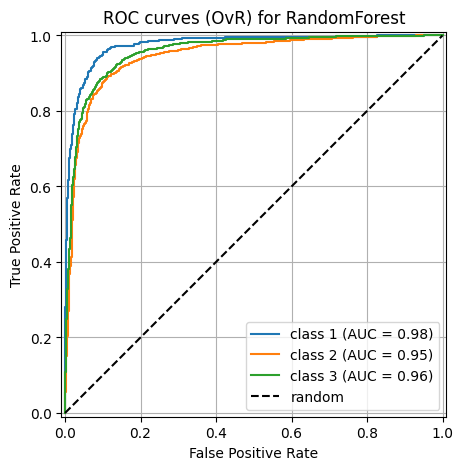

RandomForest AUC OvR macro:    0.9597
RandomForest AUC OvR weighted: 0.9524

RandomForest test acc: 0.8614


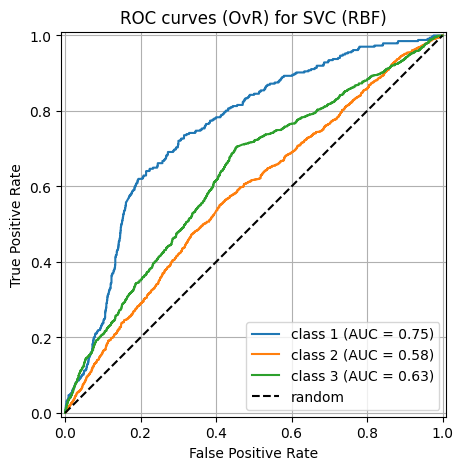

SVC (RBF) AUC OvR macro:    0.6545
SVC (RBF) AUC OvR weighted: 0.6139

SVC (RBF) test acc: 0.5811


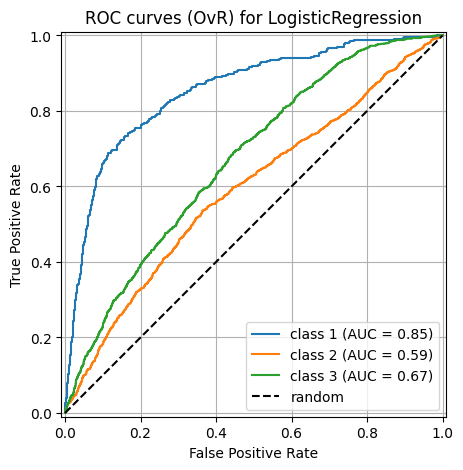

LogisticRegression AUC OvR macro:    0.7055
LogisticRegression AUC OvR weighted: 0.6436

LogisticRegression test acc: 0.4866


In [104]:
from sklearn.preprocessing import label_binarize

classes = np.unique(y_train)
n_classes = len(classes)

# бинаризация истинных меток для OvR
y_test_bin = label_binarize(y_test, classes=classes)

# вероятности от моделей
y_proba_rf  = rf_best.predict_proba(X_test)
y_proba_svc = svc_best.predict_proba(X_test)
y_proba_lr  = log_reg.predict_proba(X_test)

def plot_roc_ovr(y_true_bin, y_score, model_name):
    plt.figure(figsize=(6, 5))
    for i, cls in enumerate(classes):
        RocCurveDisplay.from_predictions(
            y_true_bin[:, i],
            y_score[:, i],
            name=f"class {cls}",
            ax=plt.gca(),
        )
    plt.plot([0, 1], [0, 1], "k--", label="random")
    plt.title(f"ROC curves (OvR) for {model_name}")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.grid(True)
    plt.legend()
    plt.show()

    auc_macro = roc_auc_score(y_test, y_score, multi_class="ovr", average="macro")
    auc_weighted = roc_auc_score(y_test, y_score, multi_class="ovr", average="weighted")
    y_pred = classes[np.argmax(y_score, axis=1)]
    acc = accuracy_score(y_test, y_pred)
    
    print(f"{model_name} AUC OvR macro:    {auc_macro:.4f}")
    print(f"{model_name} AUC OvR weighted: {auc_weighted:.4f}\n")
    print(f"{model_name} test acc: {acc:.4f}")

# RF
plot_roc_ovr(y_test_bin, y_proba_rf, "RandomForest")

# SVC
plot_roc_ovr(y_test_bin, y_proba_svc, "SVC (RBF)")

# LogReg
plot_roc_ovr(y_test_bin, y_proba_lr, "LogisticRegression")

Объедините ваши модели с помощью [VotingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html), произведите подбор весов в голосовании, оцените качество классификации и сравните с исходными моделями

In [105]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
    estimators=[
        ("rf", rf_best),
        ("svc", svc_best),
        ("lr", log_reg),
    ],
    voting="soft",           # нужны predict_proba у всех моделей 
    weights=[1.0, 1.0, 1.0], # пока равные веса
    n_jobs=None,
)

voting_clf.fit(X_train, y_train)
y_pred_vote = voting_clf.predict(X_test)
vote_acc = accuracy_score(y_test, y_pred_vote)
print("Voting (soft) test acc:", vote_acc)
print("Voting classification report:\n", classification_report(y_test, y_pred_vote))

Voting (soft) test acc: 0.6731428571428572
Voting classification report:
               precision    recall  f1-score   support

           1       0.52      0.43      0.47       337
           2       0.67      0.85      0.75      1989
           3       0.75      0.44      0.55      1174

    accuracy                           0.67      3500
   macro avg       0.65      0.57      0.59      3500
weighted avg       0.68      0.67      0.66      3500



In [111]:
def objective_blend(trial):
    w_rf = trial.suggest_float("w_rf", 0.0, 3.0)
    w_svc = trial.suggest_float("w_svc", 0.0, 3.0)
    w_lr = trial.suggest_float("w_lr", 0.0, 3.0)

    clf = VotingClassifier(
        estimators=[
            ("rf", rf_best),
            ("svc", svc_best),
            ("lr", log_reg),
        ],
        voting="soft",
        weights=[w_rf, w_svc, w_lr],
        n_jobs=-1,
    )

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    # для блендинга логично оптимизировать именно AUC по OvR 
    scores = cross_val_score(clf, X_train, y_train, cv=cv, scoring="roc_auc_ovr", n_jobs=-1)
    return scores.mean()

study_blend = optuna.create_study(direction="maximize")
study_blend.optimize(objective_blend, n_trials=30, show_progress_bar=True)

print("Best blending scores:", study_blend.best_value)
print("Best blending weights:", study_blend.best_params)

w_rf = study_blend.best_params["w_rf"]
w_svc = study_blend.best_params["w_svc"]
w_lr = study_blend.best_params["w_lr"]

voting_best = VotingClassifier(
    estimators=[("rf", rf_best), ("svc", svc_best), ("lr", log_reg)],
    voting="soft",
    weights=[w_rf, w_svc, w_lr],
    n_jobs=-1,
)

voting_best.fit(X_train, y_train)
y_pred_vote = voting_best.predict(X_test)
vote_acc = accuracy_score(y_test, y_pred_vote)
print("Voting(best weights) test acc:", vote_acc)
print("Voting(best weights) report:\n", classification_report(y_test, y_pred_vote))

[I 2025-11-17 04:09:34,477] A new study created in memory with name: no-name-f9b28ef0-b63e-4ad9-8034-cc9a8ebb90c8
Best trial: 0. Best value: 0.778189:   3%|▎         | 1/30 [00:51<25:01, 51.77s/it]

[I 2025-11-17 04:10:26,251] Trial 0 finished with value: 0.7781891197161546 and parameters: {'w_rf': 1.2002239870819824, 'w_svc': 0.5123484708329052, 'w_lr': 1.9166855630173514}. Best is trial 0 with value: 0.7781891197161546.


Best trial: 0. Best value: 0.778189:   7%|▋         | 2/30 [01:39<23:09, 49.62s/it]

[I 2025-11-17 04:11:14,366] Trial 1 finished with value: 0.7736466718785755 and parameters: {'w_rf': 0.5684974593503886, 'w_svc': 1.558482036573651, 'w_lr': 0.4537329376920768}. Best is trial 0 with value: 0.7781891197161546.


Best trial: 0. Best value: 0.778189:  10%|█         | 3/30 [02:27<21:49, 48.49s/it]

[I 2025-11-17 04:12:01,506] Trial 2 finished with value: 0.7520033610450028 and parameters: {'w_rf': 0.5362349314868916, 'w_svc': 2.129545971212528, 'w_lr': 1.3291572652182468}. Best is trial 0 with value: 0.7781891197161546.


Best trial: 3. Best value: 0.782849:  13%|█▎        | 4/30 [03:15<20:56, 48.34s/it]

[I 2025-11-17 04:12:49,623] Trial 3 finished with value: 0.7828492327105192 and parameters: {'w_rf': 2.0499527754333324, 'w_svc': 2.842282205519811, 'w_lr': 2.0602613247214316}. Best is trial 3 with value: 0.7828492327105192.


Best trial: 4. Best value: 0.791454:  17%|█▋        | 5/30 [04:02<20:02, 48.09s/it]

[I 2025-11-17 04:13:37,254] Trial 4 finished with value: 0.7914537688461493 and parameters: {'w_rf': 1.4710762892798885, 'w_svc': 1.6321036168355918, 'w_lr': 0.11826137844726237}. Best is trial 4 with value: 0.7914537688461493.


Best trial: 4. Best value: 0.791454:  20%|██        | 6/30 [04:51<19:16, 48.21s/it]

[I 2025-11-17 04:14:25,699] Trial 5 finished with value: 0.7026929403146426 and parameters: {'w_rf': 0.05893846903747435, 'w_svc': 0.32441184871602724, 'w_lr': 2.158064862744401}. Best is trial 4 with value: 0.7914537688461493.


Best trial: 6. Best value: 0.793379:  23%|██▎       | 7/30 [05:41<18:41, 48.77s/it]

[I 2025-11-17 04:15:15,621] Trial 6 finished with value: 0.7933792027787305 and parameters: {'w_rf': 2.3407787231108106, 'w_svc': 2.033950863361904, 'w_lr': 1.188323370929269}. Best is trial 6 with value: 0.7933792027787305.


Best trial: 6. Best value: 0.793379:  27%|██▋       | 8/30 [06:31<18:02, 49.20s/it]

[I 2025-11-17 04:16:05,749] Trial 7 finished with value: 0.7883422893630918 and parameters: {'w_rf': 1.9573086981179162, 'w_svc': 2.1391706256825542, 'w_lr': 1.4753103512612875}. Best is trial 6 with value: 0.7933792027787305.


Best trial: 6. Best value: 0.793379:  30%|███       | 9/30 [07:19<17:03, 48.75s/it]

[I 2025-11-17 04:16:53,502] Trial 8 finished with value: 0.7887425026977104 and parameters: {'w_rf': 2.4248798388754875, 'w_svc': 0.007202873703729851, 'w_lr': 2.447921754155759}. Best is trial 6 with value: 0.7933792027787305.


Best trial: 6. Best value: 0.793379:  33%|███▎      | 10/30 [08:05<15:58, 47.95s/it]

[I 2025-11-17 04:17:39,662] Trial 9 finished with value: 0.7544927447210351 and parameters: {'w_rf': 0.807340913871958, 'w_svc': 2.966976817015486, 'w_lr': 1.9303333109108975}. Best is trial 6 with value: 0.7933792027787305.


Best trial: 10. Best value: 0.798531:  37%|███▋      | 11/30 [08:51<14:59, 47.33s/it]

[I 2025-11-17 04:18:25,603] Trial 10 finished with value: 0.7985311246844842 and parameters: {'w_rf': 2.9663334526970297, 'w_svc': 0.8857974809951075, 'w_lr': 0.9325890014749536}. Best is trial 10 with value: 0.7985311246844842.


Best trial: 10. Best value: 0.798531:  40%|████      | 12/30 [09:38<14:10, 47.23s/it]

[I 2025-11-17 04:19:12,599] Trial 11 finished with value: 0.7981490257623707 and parameters: {'w_rf': 2.8843328565570476, 'w_svc': 1.0071008925606835, 'w_lr': 0.9288842193431182}. Best is trial 10 with value: 0.7985311246844842.


Best trial: 12. Best value: 0.798778:  43%|████▎     | 13/30 [10:27<13:31, 47.75s/it]

[I 2025-11-17 04:20:01,541] Trial 12 finished with value: 0.7987776003223801 and parameters: {'w_rf': 2.994795830743278, 'w_svc': 0.9155244003749873, 'w_lr': 0.7282262378522977}. Best is trial 12 with value: 0.7987776003223801.


Best trial: 13. Best value: 0.799083:  47%|████▋     | 14/30 [11:14<12:44, 47.78s/it]

[I 2025-11-17 04:20:49,395] Trial 13 finished with value: 0.7990825094447602 and parameters: {'w_rf': 2.9910108897533165, 'w_svc': 1.0280548513048293, 'w_lr': 0.6934050686528859}. Best is trial 13 with value: 0.7990825094447602.


Best trial: 13. Best value: 0.799083:  50%|█████     | 15/30 [12:07<12:17, 49.16s/it]

[I 2025-11-17 04:21:41,765] Trial 14 finished with value: 0.7857808631480767 and parameters: {'w_rf': 2.602619585328937, 'w_svc': 1.088727950853917, 'w_lr': 2.974536122373459}. Best is trial 13 with value: 0.7990825094447602.


Best trial: 13. Best value: 0.799083:  53%|█████▎    | 16/30 [12:55<11:24, 48.88s/it]

[I 2025-11-17 04:22:29,999] Trial 15 finished with value: 0.7984671334305807 and parameters: {'w_rf': 1.8693193816241807, 'w_svc': 0.5979405033941042, 'w_lr': 0.5643407701333957}. Best is trial 13 with value: 0.7990825094447602.


Best trial: 13. Best value: 0.799083:  57%|█████▋    | 17/30 [13:42<10:27, 48.25s/it]

[I 2025-11-17 04:23:16,757] Trial 16 finished with value: 0.7969446148917307 and parameters: {'w_rf': 2.6562732862202685, 'w_svc': 1.3070479677381277, 'w_lr': 0.12364936937102033}. Best is trial 13 with value: 0.7990825094447602.


Best trial: 13. Best value: 0.799083:  60%|██████    | 18/30 [14:29<09:33, 47.82s/it]

[I 2025-11-17 04:24:03,584] Trial 17 finished with value: 0.7982528466321666 and parameters: {'w_rf': 2.193787362229405, 'w_svc': 0.7704552687587425, 'w_lr': 0.5978451354708759}. Best is trial 13 with value: 0.7990825094447602.


Best trial: 13. Best value: 0.799083:  63%|██████▎   | 19/30 [15:16<08:44, 47.70s/it]

[I 2025-11-17 04:24:50,998] Trial 18 finished with value: 0.7965630503729478 and parameters: {'w_rf': 2.9917507242784818, 'w_svc': 1.7841384190277685, 'w_lr': 0.9375191605853563}. Best is trial 13 with value: 0.7990825094447602.


Best trial: 13. Best value: 0.799083:  67%|██████▋   | 20/30 [16:04<07:57, 47.77s/it]

[I 2025-11-17 04:25:38,949] Trial 19 finished with value: 0.7953401339678798 and parameters: {'w_rf': 1.556772534028556, 'w_svc': 1.2661744034325717, 'w_lr': 0.445281043086622}. Best is trial 13 with value: 0.7990825094447602.


Best trial: 13. Best value: 0.799083:  70%|███████   | 21/30 [16:51<07:08, 47.66s/it]

[I 2025-11-17 04:26:26,339] Trial 20 finished with value: 0.7947529161502865 and parameters: {'w_rf': 2.6307627561646516, 'w_svc': 0.18314462675542886, 'w_lr': 1.6545456679155386}. Best is trial 13 with value: 0.7990825094447602.


Best trial: 13. Best value: 0.799083:  73%|███████▎  | 22/30 [17:38<06:19, 47.48s/it]

[I 2025-11-17 04:27:13,410] Trial 21 finished with value: 0.7982410851515715 and parameters: {'w_rf': 2.8729594039223922, 'w_svc': 0.8308658568140447, 'w_lr': 0.9306063218642876}. Best is trial 13 with value: 0.7990825094447602.


Best trial: 13. Best value: 0.799083:  77%|███████▋  | 23/30 [18:25<05:31, 47.34s/it]

[I 2025-11-17 04:28:00,403] Trial 22 finished with value: 0.7986581215144343 and parameters: {'w_rf': 2.744734659629793, 'w_svc': 1.026110892465248, 'w_lr': 0.7505412578744826}. Best is trial 13 with value: 0.7990825094447602.


Best trial: 23. Best value: 0.799252:  80%|████████  | 24/30 [19:11<04:40, 46.77s/it]

[I 2025-11-17 04:28:45,857] Trial 23 finished with value: 0.7992521754861281 and parameters: {'w_rf': 2.6447997443633127, 'w_svc': 0.5491562397581873, 'w_lr': 0.7129508003645145}. Best is trial 23 with value: 0.7992521754861281.


Best trial: 23. Best value: 0.799252:  83%|████████▎ | 25/30 [19:59<03:55, 47.08s/it]

[I 2025-11-17 04:29:33,648] Trial 24 finished with value: 0.7992390156208414 and parameters: {'w_rf': 2.341051929359714, 'w_svc': 0.5405154459311815, 'w_lr': 0.23478850349592717}. Best is trial 23 with value: 0.7992521754861281.


Best trial: 25. Best value: 0.799873:  87%|████████▋ | 26/30 [20:46<03:08, 47.14s/it]

[I 2025-11-17 04:30:20,936] Trial 25 finished with value: 0.7998732484604397 and parameters: {'w_rf': 2.3925511224456866, 'w_svc': 0.4931246150845786, 'w_lr': 0.2299988356091398}. Best is trial 25 with value: 0.7998732484604397.


Best trial: 25. Best value: 0.799873:  90%|█████████ | 27/30 [21:33<02:21, 47.10s/it]

[I 2025-11-17 04:31:07,935] Trial 26 finished with value: 0.7991051012620684 and parameters: {'w_rf': 1.7475090285611017, 'w_svc': 0.47644850286610885, 'w_lr': 0.23328716744028388}. Best is trial 25 with value: 0.7998732484604397.


Best trial: 25. Best value: 0.799873:  93%|█████████▎| 28/30 [22:20<01:34, 47.10s/it]

[I 2025-11-17 04:31:55,035] Trial 27 finished with value: 0.7995860103726644 and parameters: {'w_rf': 2.3844302117243115, 'w_svc': 0.014743998810839543, 'w_lr': 0.30366928674779636}. Best is trial 25 with value: 0.7998732484604397.


Best trial: 28. Best value: 0.800037:  97%|█████████▋| 29/30 [23:07<00:47, 47.07s/it]

[I 2025-11-17 04:32:42,022] Trial 28 finished with value: 0.8000367703782633 and parameters: {'w_rf': 2.1179400457887487, 'w_svc': 0.016453707314893817, 'w_lr': 0.3615789786117998}. Best is trial 28 with value: 0.8000367703782633.


Best trial: 28. Best value: 0.800037: 100%|██████████| 30/30 [23:54<00:00, 47.82s/it]


[I 2025-11-17 04:33:28,943] Trial 29 finished with value: 0.79925533417396 and parameters: {'w_rf': 1.2098156352866432, 'w_svc': 0.02159519507911522, 'w_lr': 0.36685725887515647}. Best is trial 28 with value: 0.8000367703782633.
Best blending scores: 0.8000367703782633
Best blending weights: {'w_rf': 2.1179400457887487, 'w_svc': 0.016453707314893817, 'w_lr': 0.3615789786117998}
Voting(best weights) test acc: 0.684
Voting(best weights) report:
               precision    recall  f1-score   support

           1       0.56      0.42      0.48       337
           2       0.69      0.82      0.75      1989
           3       0.71      0.53      0.61      1174

    accuracy                           0.68      3500
   macro avg       0.65      0.59      0.61      3500
weighted avg       0.68      0.68      0.67      3500



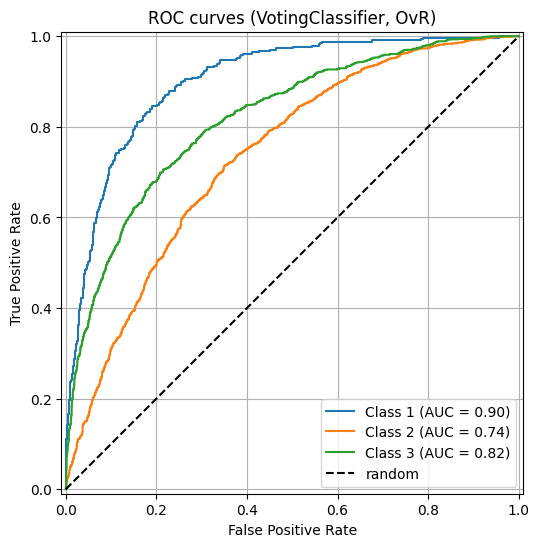

Voting AUC OvR macro:    0.8189
Voting AUC OvR weighted: 0.7798


In [112]:
from sklearn.metrics import RocCurveDisplay, roc_auc_score
from sklearn.preprocessing import label_binarize

# бинаризуем y для OvR
classes = np.unique(y_train)
n_classes = len(classes)

y_test_bin = label_binarize(y_test, classes=classes)

# вероятности от блендинга
y_score_vote = voting_best.predict_proba(X_test)

# ROC для каждого класса
plt.figure(figsize=(7, 6))
for i, cls in enumerate(classes):
    RocCurveDisplay.from_predictions(
        y_test_bin[:, i],
        y_score_vote[:, i],
        name=f"Class {cls}",
        ax=plt.gca(),
    )

plt.plot([0, 1], [0, 1], "k--", label="random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curves (VotingClassifier, OvR)")
plt.legend()
plt.grid(True)
plt.show()

# считаем multi-class AUC
auc_ovr_macro = roc_auc_score(y_test, y_score_vote, multi_class="ovr", average="macro")
auc_ovr_weighted = roc_auc_score(y_test, y_score_vote, multi_class="ovr", average="weighted")
print(f"Voting AUC OvR macro:    {auc_ovr_macro:.4f}")
print(f"Voting AUC OvR weighted: {auc_ovr_weighted:.4f}")

Второй вариант Блендинга это StackingClassifier: вероятности принадлежности классам от отдельных моделей идут на вход мета-модели (классификатор), которая принимает решение 

Теперь объедините ваши модели с помощью [StackingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html), оцените качество классификации и сравните между собой варианты с разным конечным классификатором

In [113]:
from sklearn.ensemble import StackingClassifier
estimators = [
    ("rf", rf_best),
    ("svc", svc_best),
    ("lr", log_reg),
]

# meta-классификатор 1: логрег
meta_lr = make_pipeline(
    StandardScaler(),
    LogisticRegression(
        max_iter=1000,
        class_weight="balanced",
        n_jobs=-1,
        random_state=42,
    ),
)

stack_lr = StackingClassifier(
    estimators=estimators,
    final_estimator=meta_lr,
    stack_method="predict_proba",  # передаём вероятности наверх
    cv=5,
    n_jobs=-1,
)

# оценка по CV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
stack_lr_cv_scores = cross_val_score(
    stack_lr, X_train, y_train,
    cv=cv, scoring="accuracy", n_jobs=-1
)
print(f"Stack (meta=LogReg) CV acc: {stack_lr_cv_scores.mean():.4f} ± {stack_lr_cv_scores.std():.4f}")

# обучение и тест
stack_lr.fit(X_train, y_train)
y_pred_stack_lr = stack_lr.predict(X_test)
stack_lr_acc = accuracy_score(y_test, y_pred_stack_lr)
print(f"Stack (meta=LogReg) test acc: {stack_lr_acc:.4f}")
print("Stack (meta=LogReg) report:\n",
      classification_report(y_test, y_pred_stack_lr))

Stack (meta=LogReg) CV acc: 0.6154 ± 0.0093
Stack (meta=LogReg) test acc: 0.6394
Stack (meta=LogReg) report:
               precision    recall  f1-score   support

           1       0.41      0.72      0.52       337
           2       0.75      0.58      0.66      1989
           3       0.61      0.72      0.66      1174

    accuracy                           0.64      3500
   macro avg       0.59      0.67      0.61      3500
weighted avg       0.67      0.64      0.64      3500



In [114]:

meta_rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    n_jobs=-1,
    random_state=42,
)

stack_rf = StackingClassifier(
    estimators=estimators,
    final_estimator=meta_rf,
    stack_method="predict_proba",
    cv=5,
    n_jobs=-1,
)

stack_rf_cv_scores = cross_val_score(
    stack_rf, X_train, y_train,
    cv=cv, scoring="accuracy", n_jobs=-1
)
print(f"Stack (meta=RF) CV acc: {stack_rf_cv_scores.mean():.4f} ± {stack_rf_cv_scores.std():.4f}")

stack_rf.fit(X_train, y_train)
y_pred_stack_rf = stack_rf.predict(X_test)
stack_rf_acc = accuracy_score(y_test, y_pred_stack_rf)
print(f"Stack (meta=RF) test acc: {stack_rf_acc:.4f}")
print("Stack (meta=RF) report:\n",
      classification_report(y_test, y_pred_stack_rf))

Stack (meta=RF) CV acc: 0.6569 ± 0.0074


/Users/zuha/miniconda3/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Stack (meta=RF) test acc: 0.6726
Stack (meta=RF) report:
               precision    recall  f1-score   support

           1       0.60      0.37      0.46       337
           2       0.68      0.81      0.74      1989
           3       0.67      0.53      0.59      1174

    accuracy                           0.67      3500
   macro avg       0.65      0.57      0.60      3500
weighted avg       0.67      0.67      0.66      3500



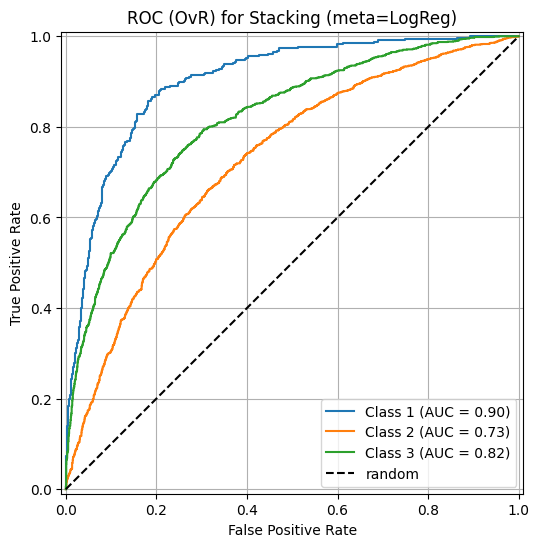

Stacking (meta=LogReg) AUC OvR macro:    0.8146
Stacking (meta=LogReg) AUC OvR weighted: 0.7733



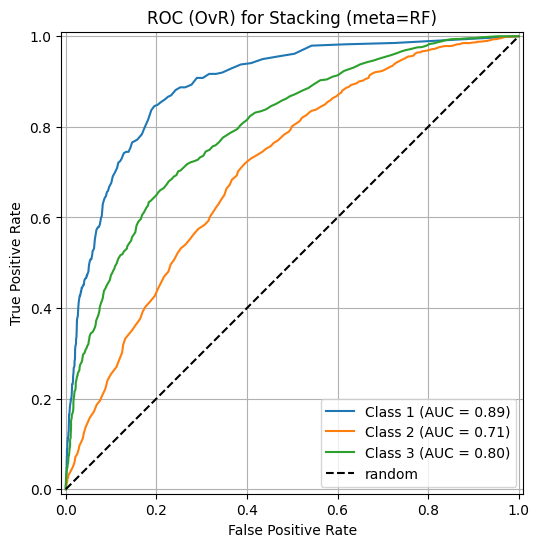

Stacking (meta=RF) AUC OvR macro:    0.7991
Stacking (meta=RF) AUC OvR weighted: 0.7558



In [115]:


classes = np.unique(y_train)
y_test_bin = label_binarize(y_test, classes=classes)

def eval_stack_roc(model, model_name):
    y_score = model.predict_proba(X_test)

    plt.figure(figsize=(7, 6))
    for i, cls in enumerate(classes):
        RocCurveDisplay.from_predictions(
            y_test_bin[:, i],
            y_score[:, i],
            name=f"Class {cls}",
            ax=plt.gca(),
        )
    plt.plot([0, 1], [0, 1], "k--", label="random")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC (OvR) for {model_name}")
    plt.legend()
    plt.grid(True)
    plt.show()

    auc_macro = roc_auc_score(y_test, y_score, multi_class="ovr", average="macro")
    auc_weighted = roc_auc_score(y_test, y_score, multi_class="ovr", average="weighted")
    print(f"{model_name} AUC OvR macro:    {auc_macro:.4f}")
    print(f"{model_name} AUC OvR weighted: {auc_weighted:.4f}\n")

eval_stack_roc(stack_lr, "Stacking (meta=LogReg)")
eval_stack_roc(stack_rf, "Stacking (meta=RF)")

Сравните лучший StackingClassifier с исходными моделями и VotingClassifier

In [116]:
classes = np.unique(y_train)

def eval_model(name, model, X_test, y_test):
    # предсказанные классы
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    # предсказанные вероятности (нужны для AUC)
    y_proba = model.predict_proba(X_test)

    auc_macro = roc_auc_score(
        y_test,
        y_proba,
        multi_class="ovr",
        average="macro",
    )
    auc_weighted = roc_auc_score(
        y_test,
        y_proba,
        multi_class="ovr",
        average="weighted",
    )

    return {
        "name": name,
        "acc": acc,
        "auc_macro": auc_macro,
        "auc_weighted": auc_weighted,
    }

results = []

results.append(eval_model("RandomForest", rf_best, X_test, y_test))
results.append(eval_model("SVC (RBF)",  svc_best, X_test, y_test))
results.append(eval_model("LogReg",     log_reg,  X_test, y_test))
results.append(eval_model("Voting(best weights)", voting_best, X_test, y_test))
results.append(eval_model("Stacking (meta=LogReg)", stack_lr, X_test, y_test))
results.append(eval_model("Stacking (meta=RF)",     stack_rf, X_test, y_test))

# печатаем аккуратно
print("Model comparison on test set:")
print("{:<28s}  {:>8s}  {:>12s}  {:>14s}".format("Model", "Acc", "AUC_macro", "AUC_weighted"))
for r in results:
    print("{:<28s}  {:8.4f}  {:12.4f}  {:14.4f}".format(
        r["name"], r["acc"], r["auc_macro"], r["auc_weighted"]
    ))

# выбираем лучший stacking по AUC_macro (можешь поменять на acc)
best_stack = max(
    [r for r in results if r["name"].startswith("Stacking")],
    key=lambda x: x["auc_macro"],
)
print("\nBest stacking model by AUC_macro:", best_stack["name"])

Model comparison on test set:
Model                              Acc     AUC_macro    AUC_weighted
RandomForest                    0.8614        0.9597          0.9524
SVC (RBF)                       0.5749        0.6545          0.6139
LogReg                          0.4866        0.7055          0.6436
Voting(best weights)            0.6840        0.8189          0.7798
Stacking (meta=LogReg)          0.6394        0.8146          0.7733
Stacking (meta=RF)              0.6726        0.7991          0.7558

Best stacking model by AUC_macro: Stacking (meta=LogReg)


**Вопрос:** Какие модели вы взяли? Какая модель оказалось лучшей? Получилось ли улучшить качество с помощью Блендинга? Предположите почему?

Случайный лес показал наилучшее качество среди одиночных моделей (accuracy 0.8614, AUC OvR macro 0.9597). Это соответствует теоретическим ожиданиям: для табличных данных с нелинейными зависимостями RandomForest является сильной “из коробки” моделью, объединяющей множество решающих деревьев и эффективно снижающей дисперсию за счёт бутстрэпа и случайного подбора признаков.
Соответственно когда его смешивают с другими моделями точность наоборот понижается, так что на этом датасете логичнее оставить только случайный лес